# Summary

This note explored the shortest way to plot the current status of the number of infected people in each country. A graph of the change in each country has been created. This can be seen as a measure of whether the infection is spreading or shrinking.

## Comment

Recent reports have confirmed infected people in 89 countries or regions.

Recent trends indicate a continuing increase in new cases in Austria, Bahrain, Canada, Hong Kong, Iceland, Iraq, Kuwait, Netherlands, Norway, Singapore, Sweden, Switzerland, Taiwan, Thailand, and UAE. According to the difference plot, new cases are exploding in Australia, France, Germany, Iran, Italy, Japan, Malaysia, Korea, Spain, United Kingdom and the United States. These countries need to be monitored closely. New trends are emerging in Asia, Europe and the Middle East. Infected people were found on all continents except Antarctica.

The countries with the most reported infections in one day have changed from Korea to Iran or Italy.

At the world level, new outbreaks are occurring outside of China. Apparently, the epicenter is moving. The situation seems very bad. A second spread of infection has occurred. As WHO shows, it looks like a pandemic. The new case has changed from a decrease to an increase.

The sudden increase in cases indicates that even in countries where the number of infected people is zero, the disease may be progressing where infection is not visible. 

Updated March 5, 2020


# Prepare

In [1]:
import numpy as np        # linear algebra
import pandas as pd       # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")

# fill NaN
df = df.fillna({"Province/State": 'None'})

# Change astype
df["Date"] = pd.to_datetime(df["ObservationDate"])
df["Confirmed"] = df["Confirmed"].astype('int')
df["Deaths"] = df["Deaths"].astype('int')
df["Recovered"] =df["Recovered"].astype('int')

# Drop sno and Last Update
df = df.drop(columns=["SNo","Last Update", "ObservationDate"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 6 columns):
Province/State    3395 non-null object
Country/Region    3395 non-null object
Confirmed         3395 non-null int64
Deaths            3395 non-null int64
Recovered         3395 non-null int64
Date              3395 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 159.3+ KB


# Hot Spots

Displays the top 10 hotspots.

In [3]:
unique_date = np.sort(df["Date"].unique())
last = df[df["Date"] == unique_date[-1]].groupby(["Country/Region"]).sum()["Confirmed"]

past = []
for n in [1, 3, 7, 14, 28]:
    n_days_ago = df[df["Date"] == unique_date[-(n + 1)]].groupby(["Country/Region"]).sum()["Confirmed"]
    # diff
    diff = last.sub(n_days_ago, fill_value=0).astype(int)
    rank = diff.rank(method='min', ascending=False).astype(int)
    past.append(pd.concat([rank, diff], axis=1, keys=["Rank", "New"]))

keys = ["-1d","-3d", "-1w", "-2w", "-4w"]
hot = pd.concat(past, axis=1, keys=keys).sort_values([("-1d","Rank")])
hot.head(15).style.background_gradient(cmap='coolwarm',
                                       subset=[(k, "New") for k in keys])

# World Situation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc30fe74ba8>,
      dtype=object)

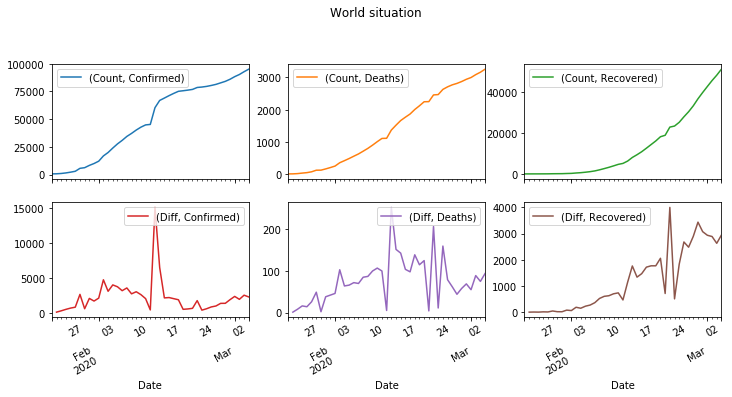

In [4]:
group_all = df.groupby(["Date"]).sum()
diff = group_all.diff()
world_situation = pd.concat([group_all, diff],
                             axis=1, keys=["Count", "Diff"])
world_situation.plot(title="World situation", subplots=True, layout=(3, 3), figsize=(12, 8))

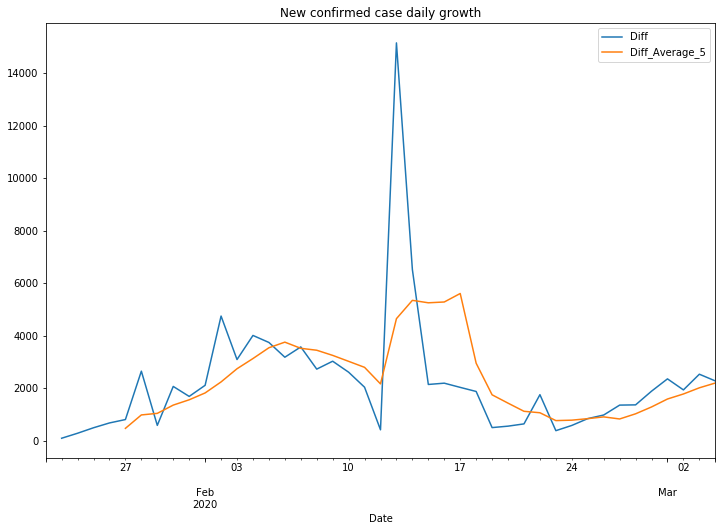

In [5]:
group_all = df.groupby(["Date"]).sum()["Confirmed"]
diff = group_all.diff()
world_situation = pd.concat([diff, diff.rolling(5).mean()],
                             axis=1, keys=["Diff", "Diff_Average_5"])
world_situation.plot(title="New confirmed case daily growth", figsize=(12, 8))

# Graph of diff per day in each country

In [6]:
# Sort by Date
df = df.sort_values(["Date"]).reset_index(drop=True)

group_country = df.groupby(["Country/Region", "Date"]).sum()
group_country

Confirmed  Deaths  Recovered
Country/Region Date                                    
 Azerbaijan    2020-02-28          1       0          0
Afghanistan    2020-02-24          1       0          0
               2020-02-25          1       0          0
               2020-02-26          1       0          0
               2020-02-27          1       0          0
...                              ...     ...        ...
Vietnam        2020-02-29         16       0         16
               2020-03-01         16       0         16
               2020-03-02         16       0         16
               2020-03-03         16       0         16
               2020-03-04         16       0         16

[1462 rows x 3 columns]

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


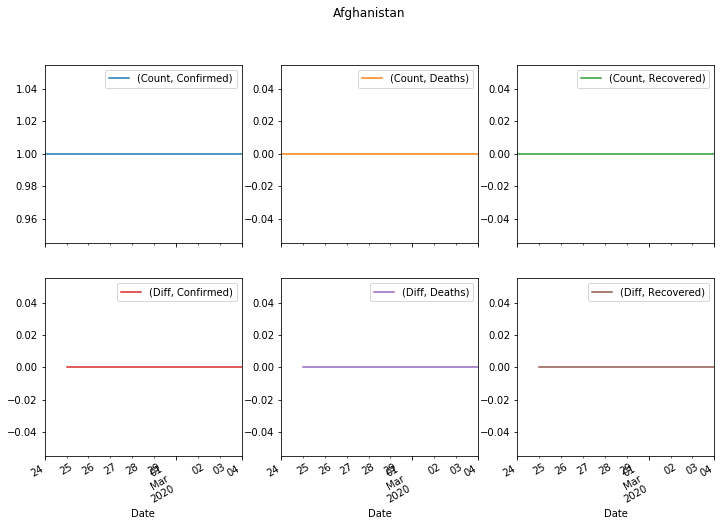

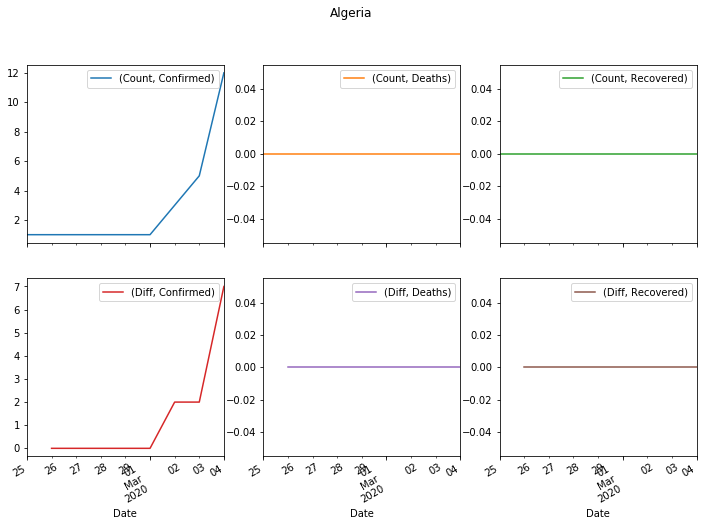

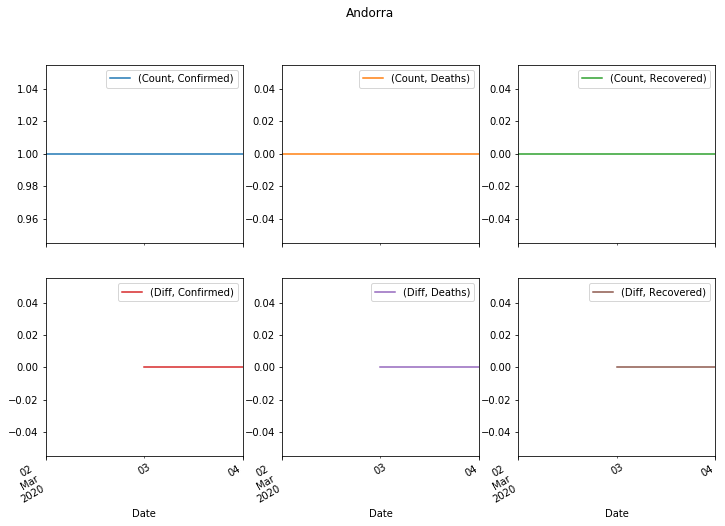

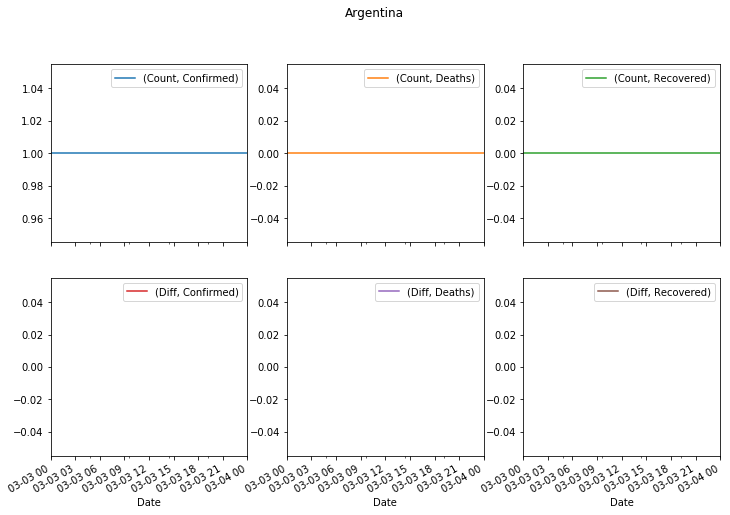

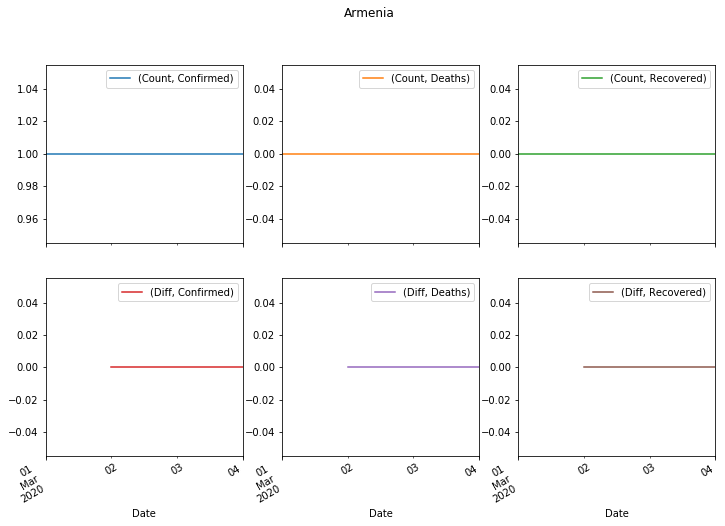

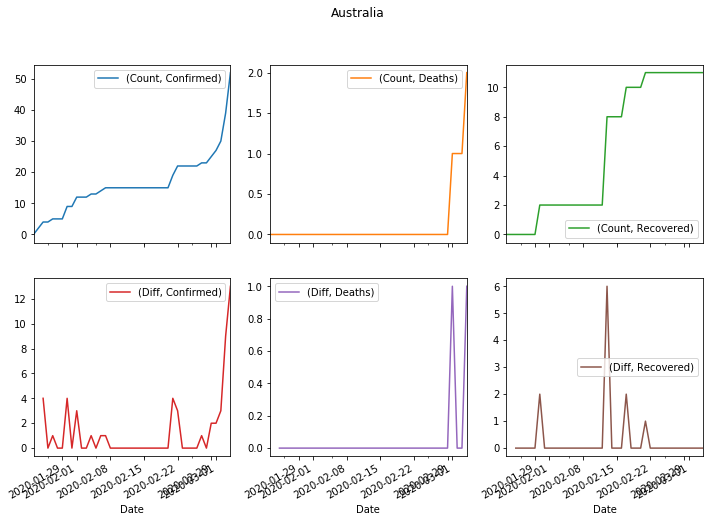

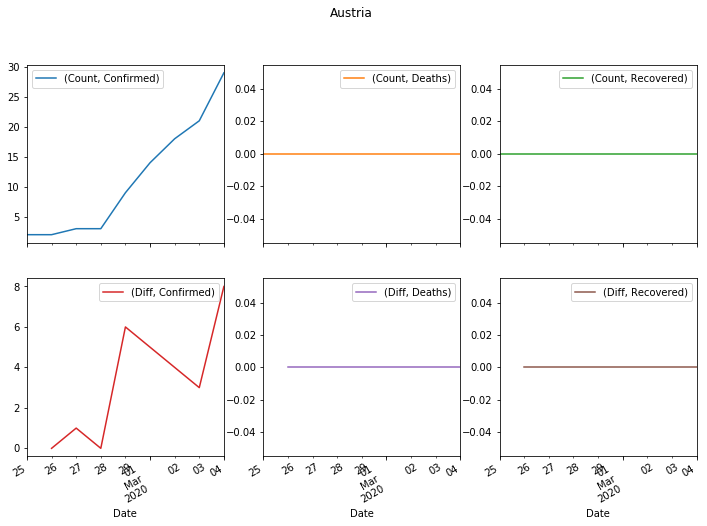

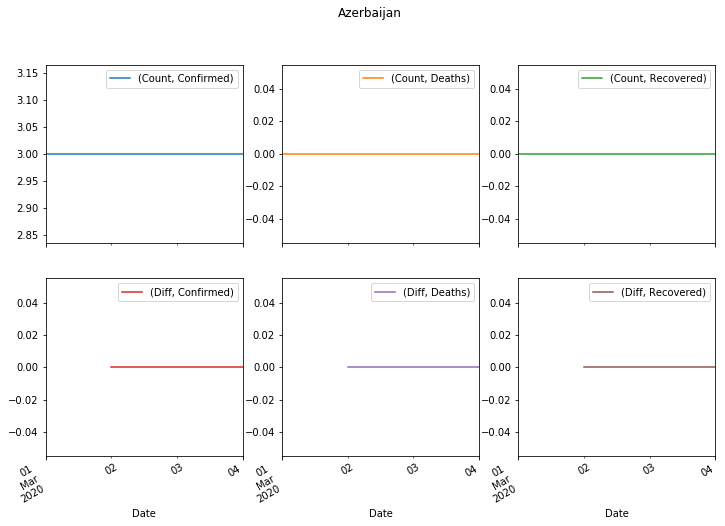

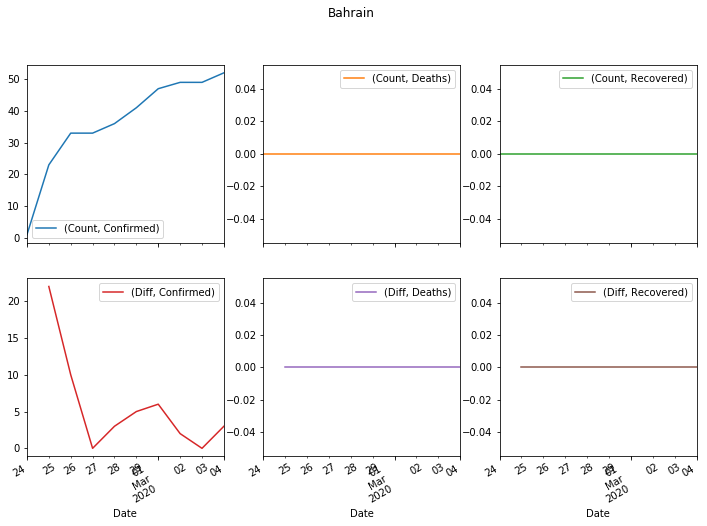

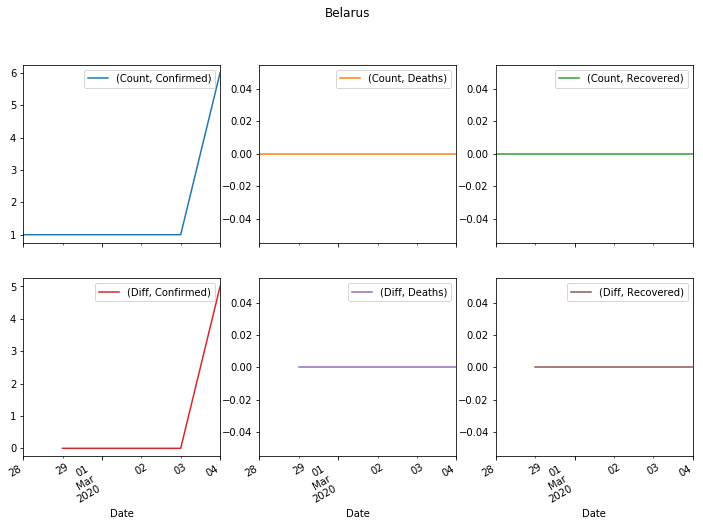

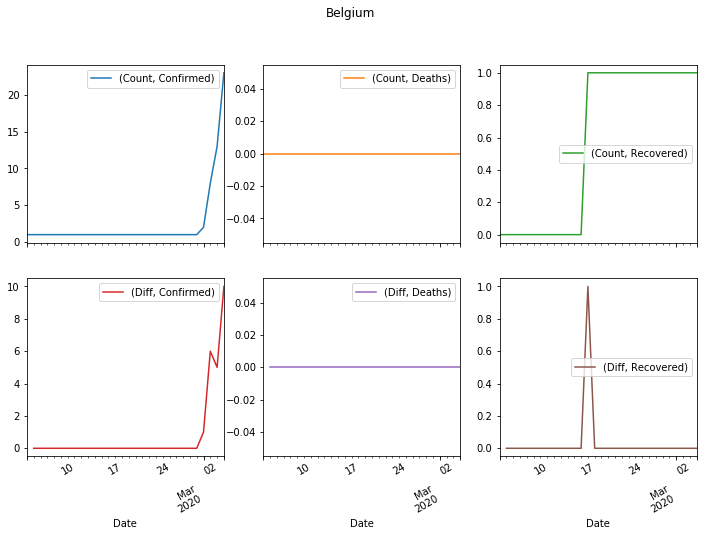

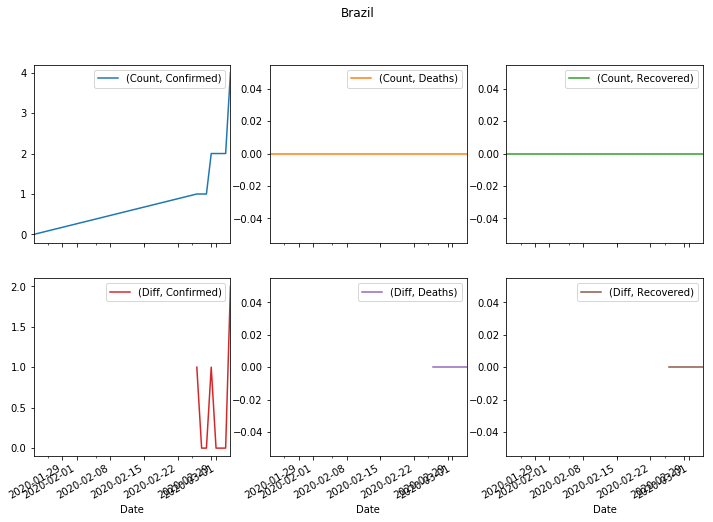

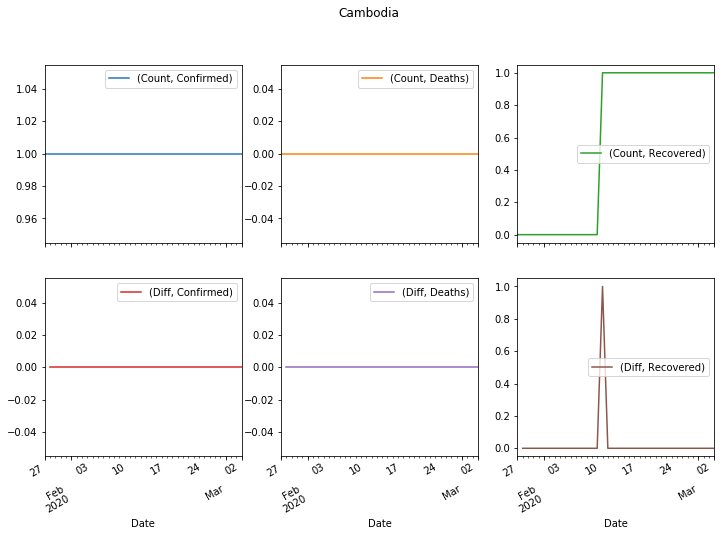

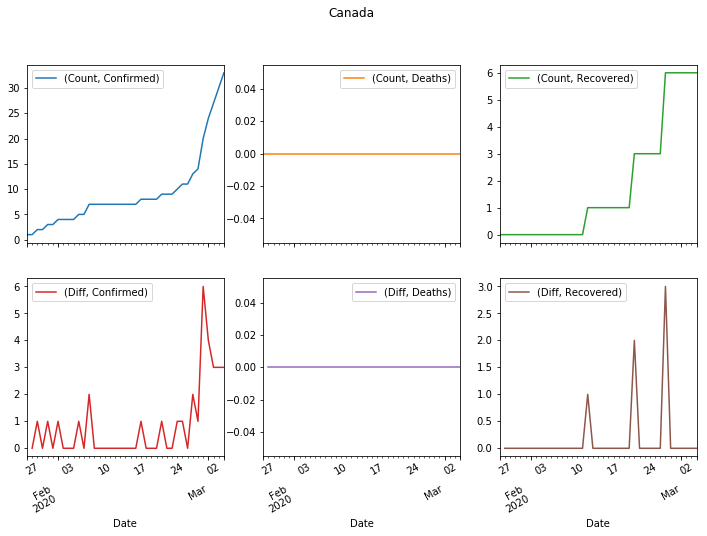

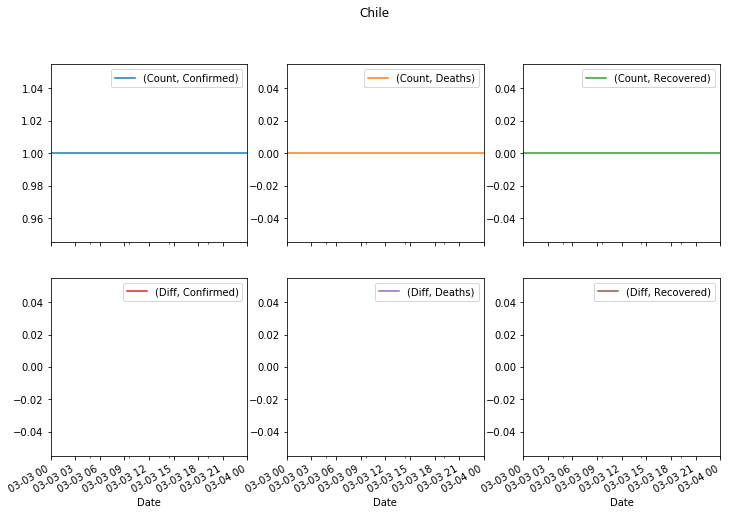

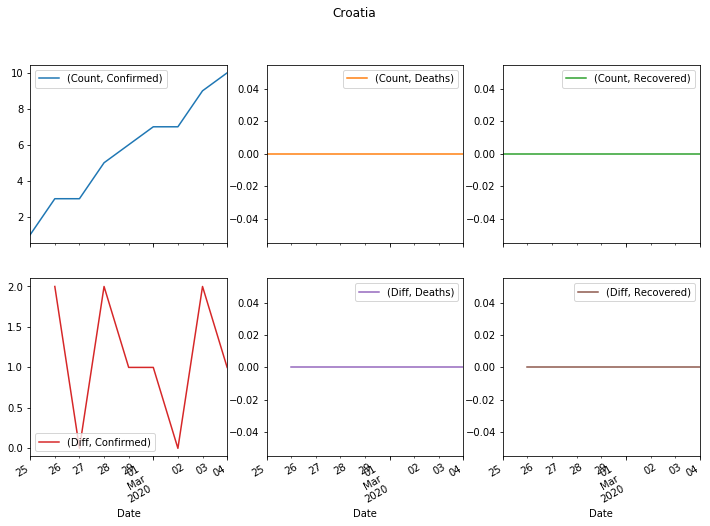

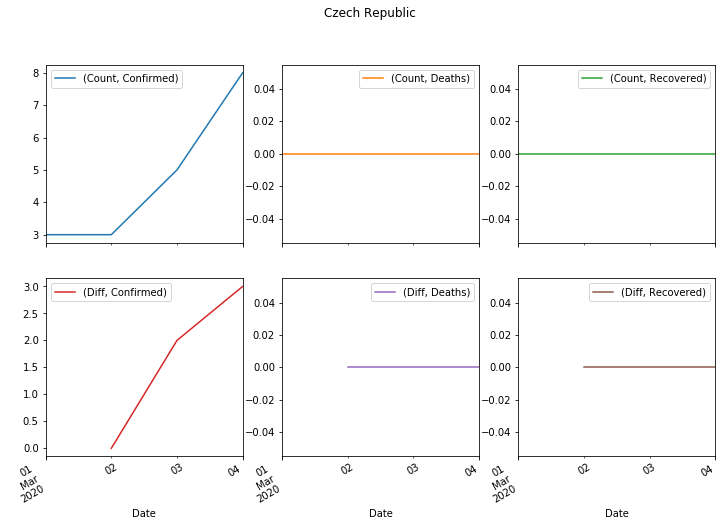

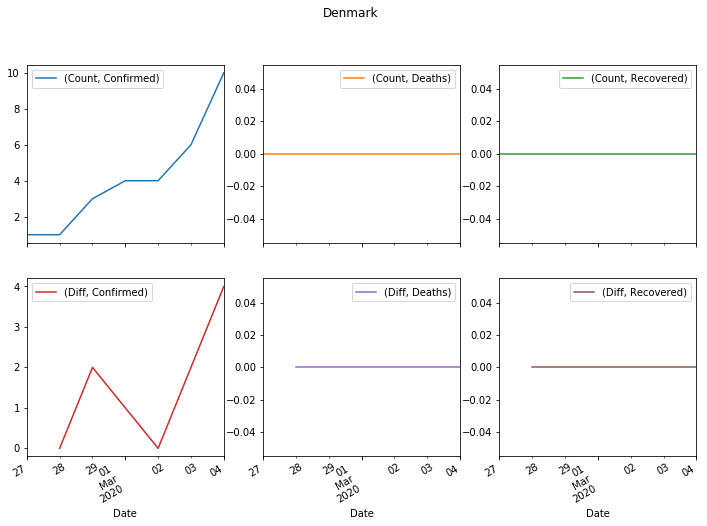

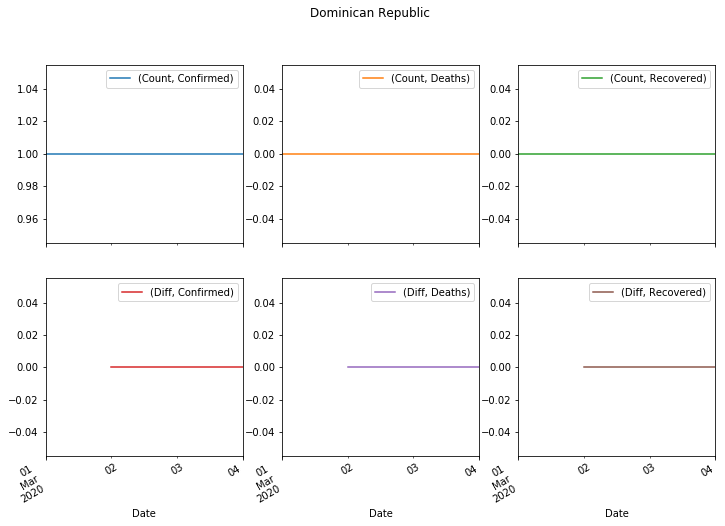

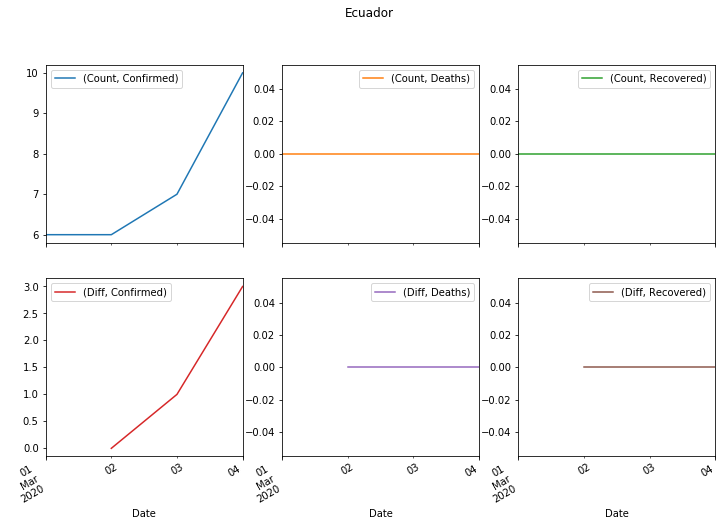

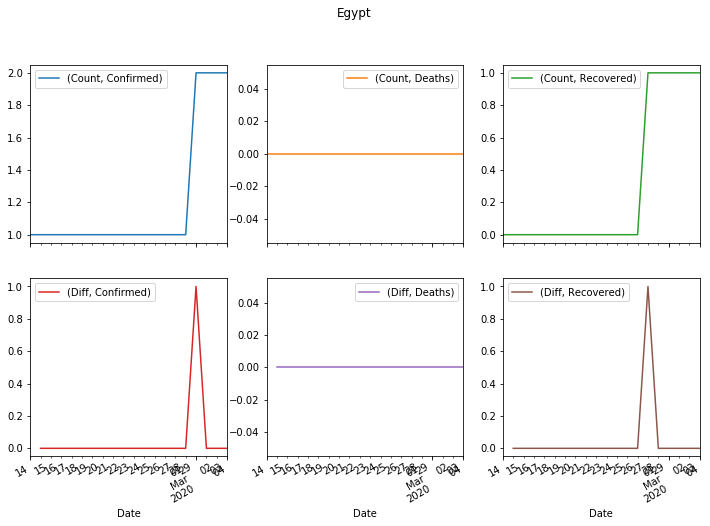

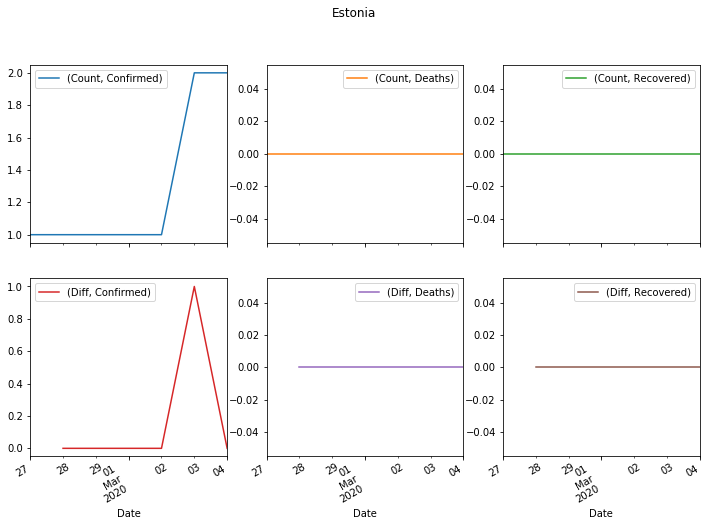

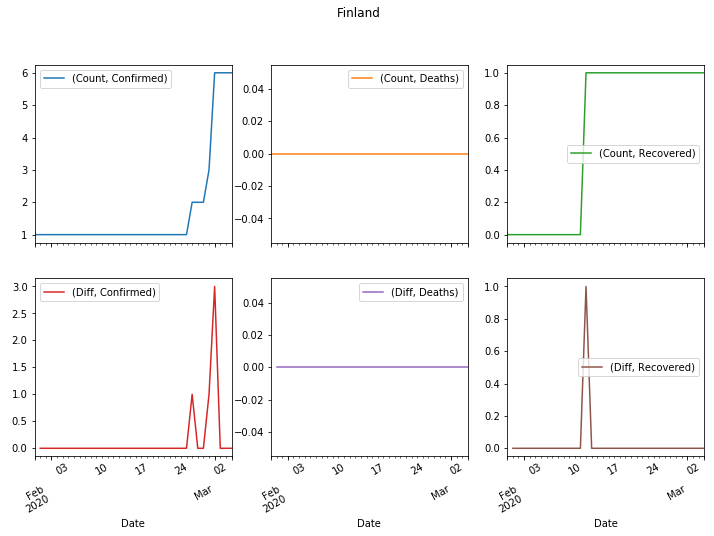

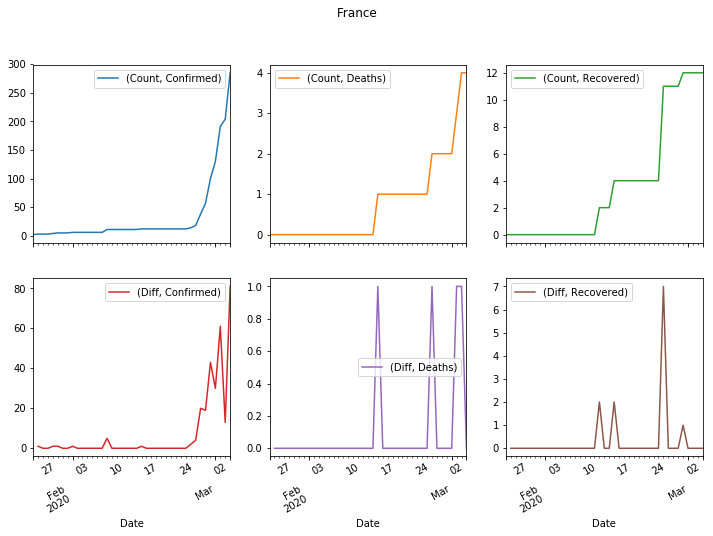

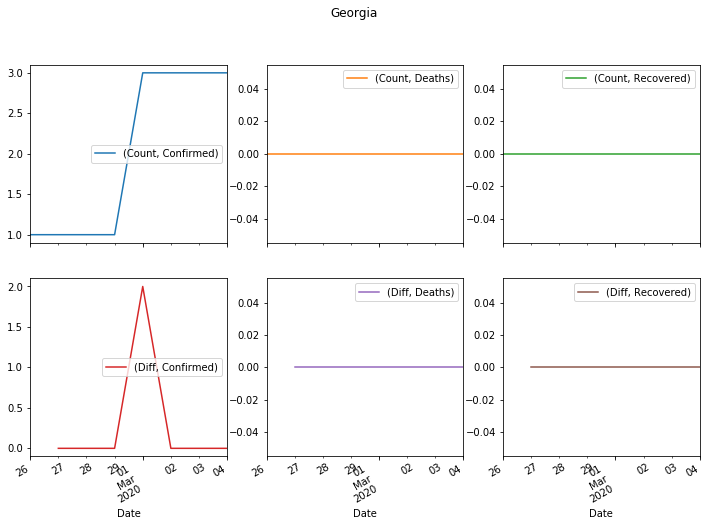

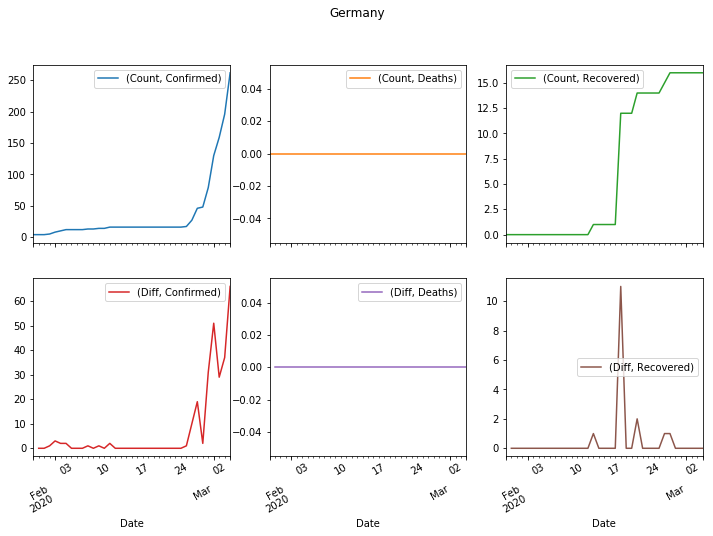

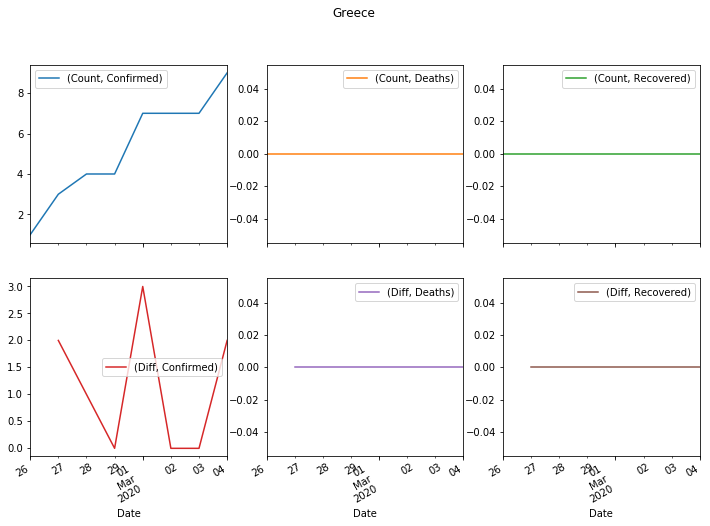

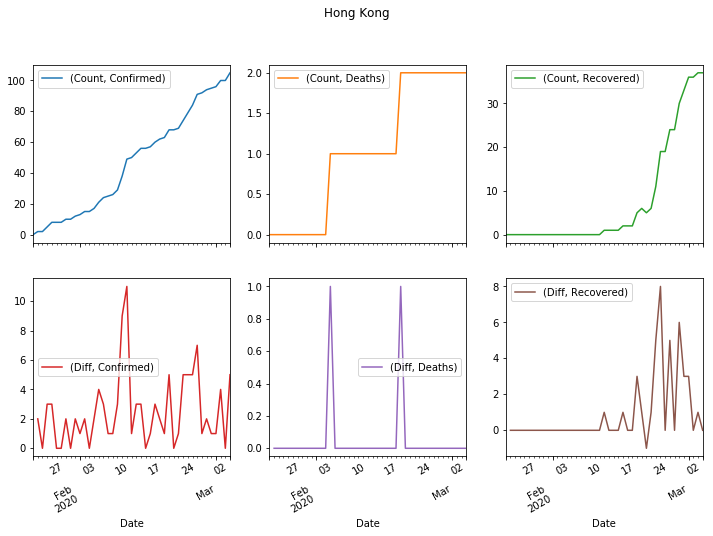

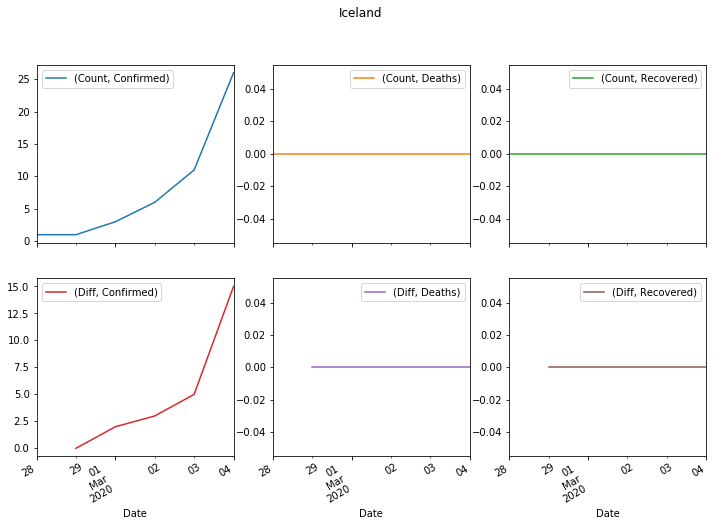

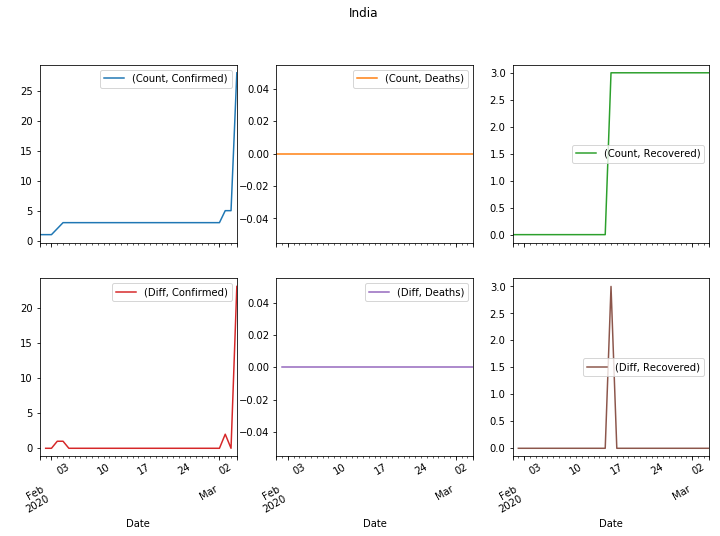

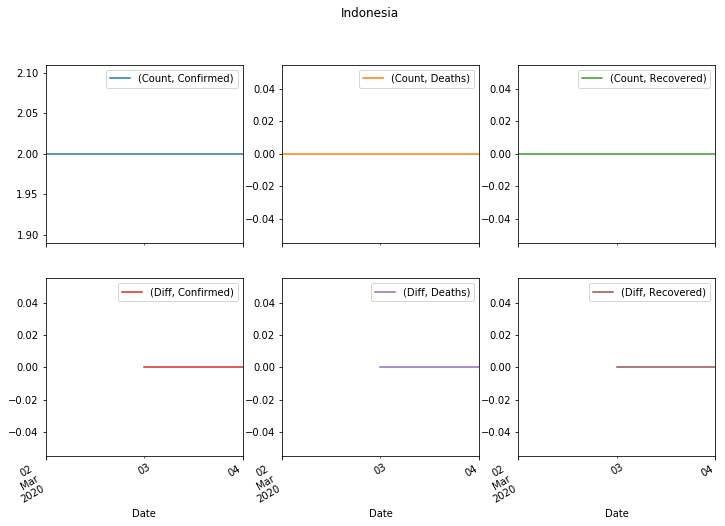

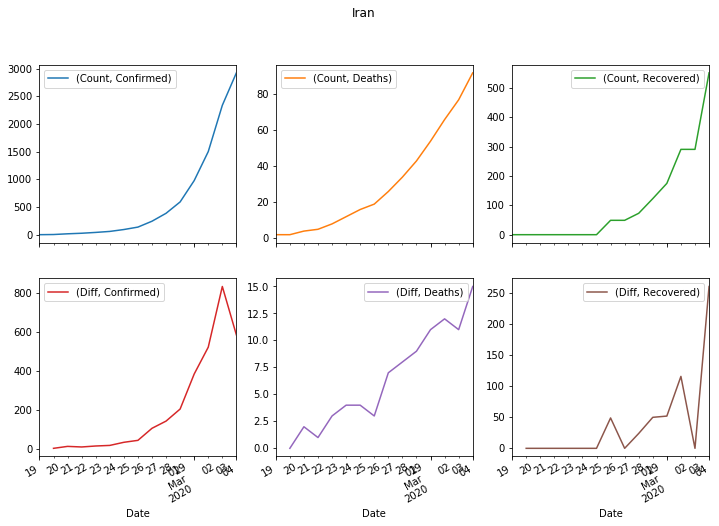

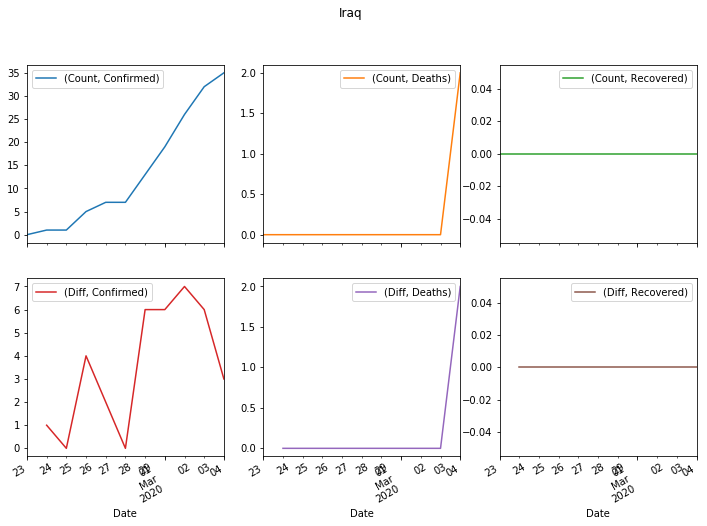

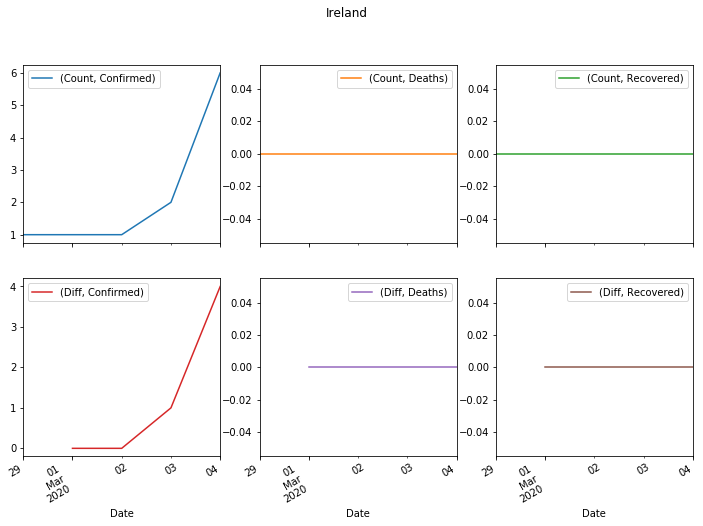

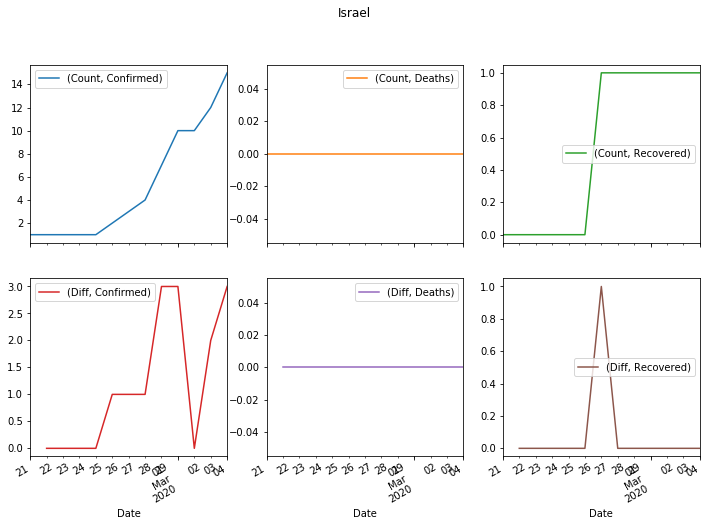

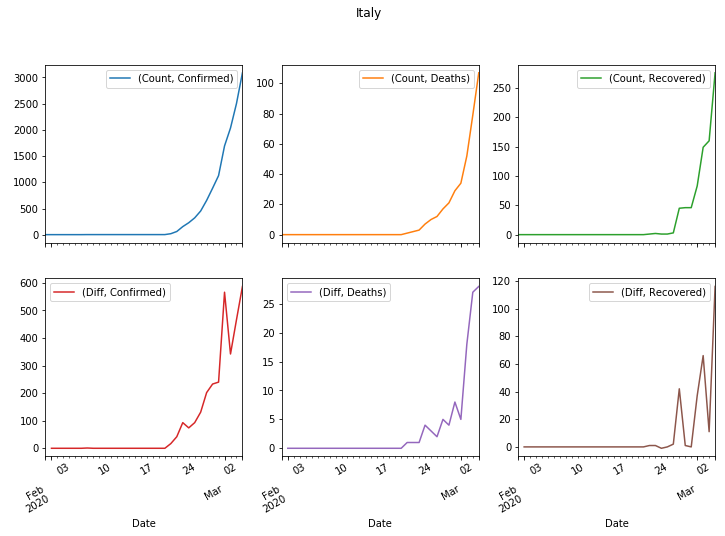

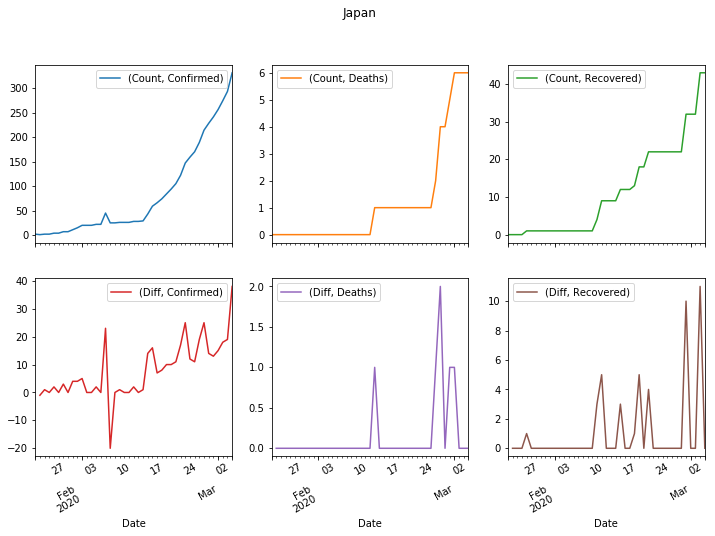

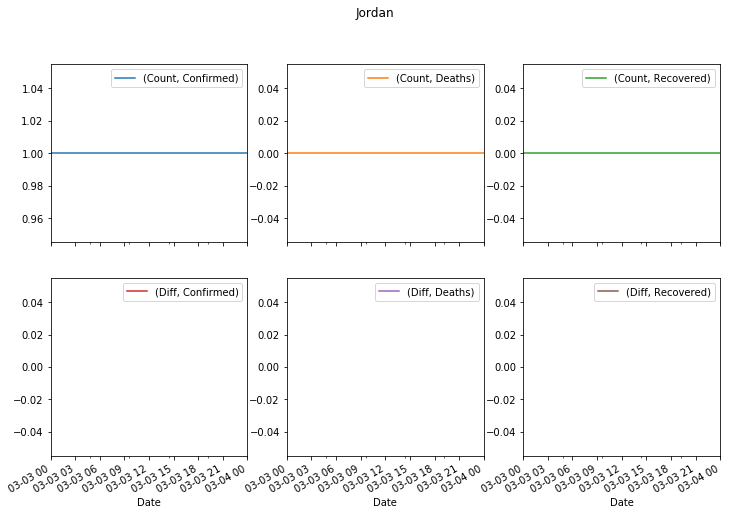

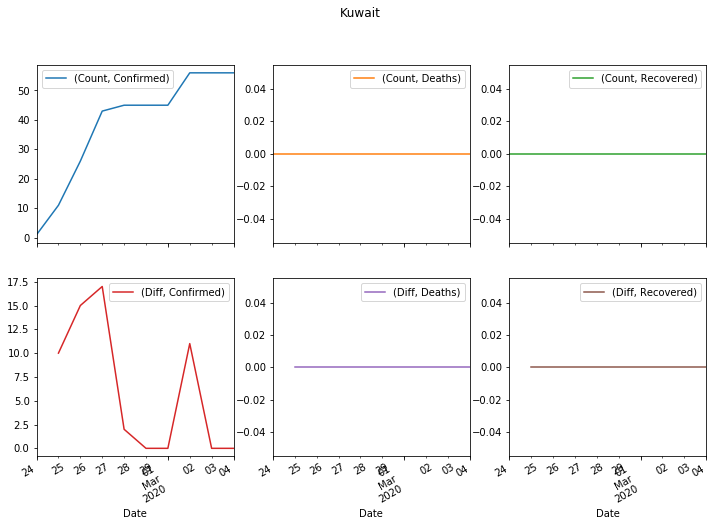

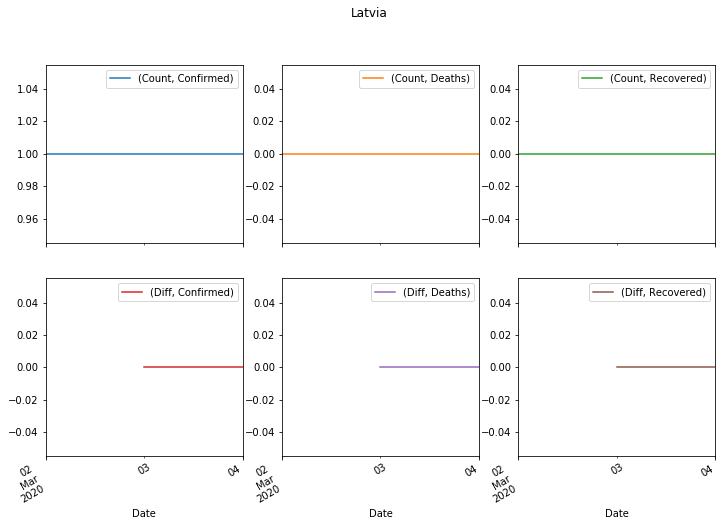

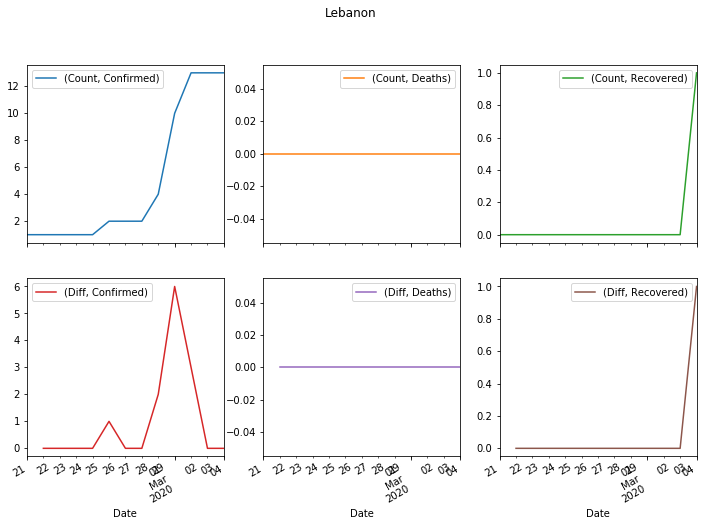

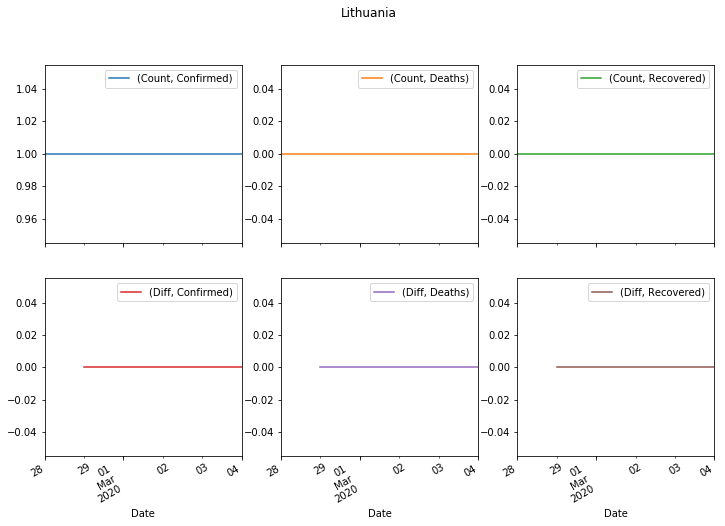

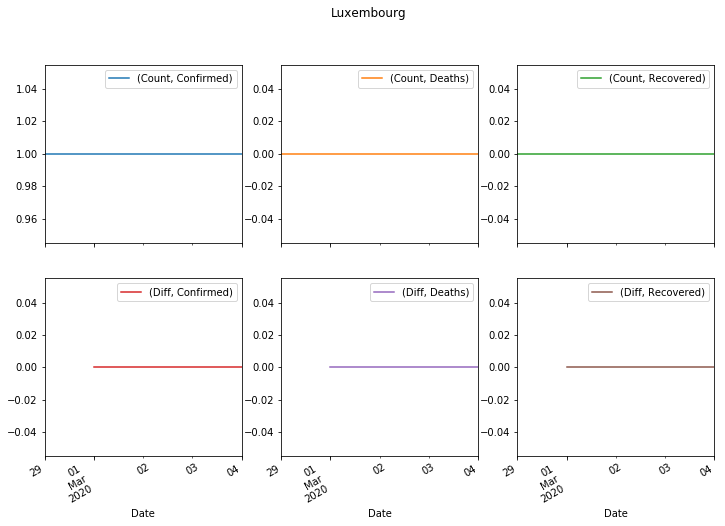

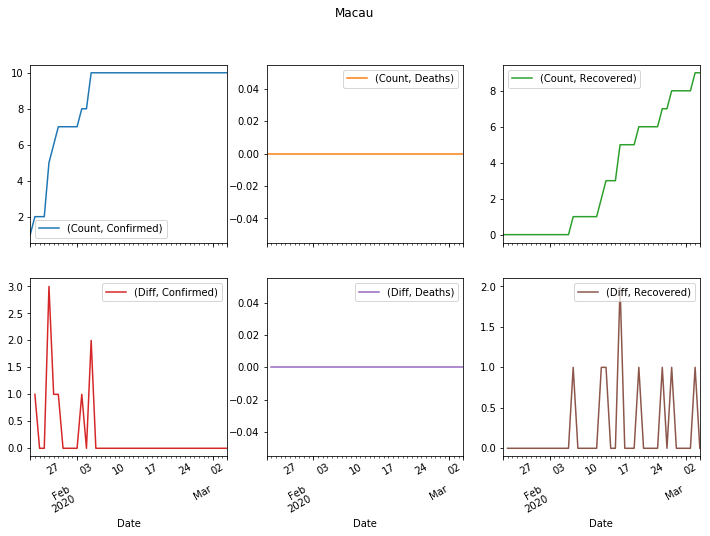

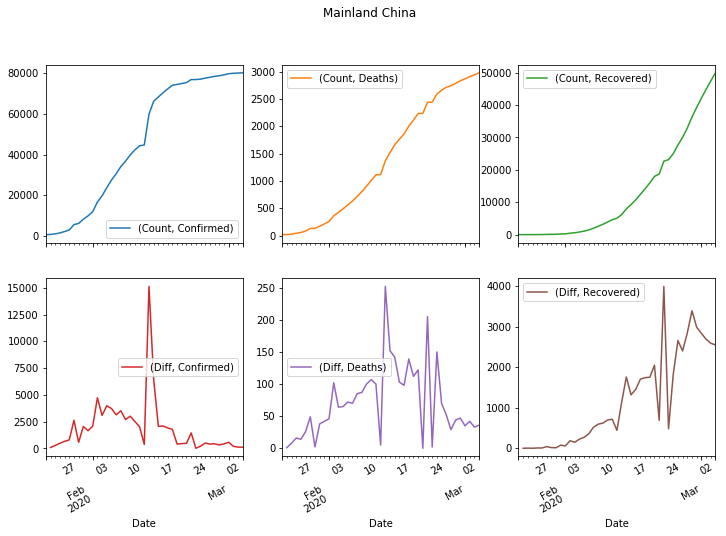

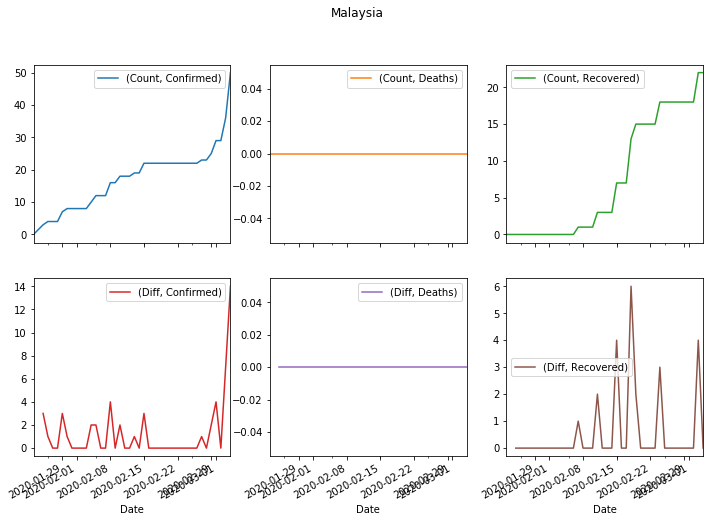

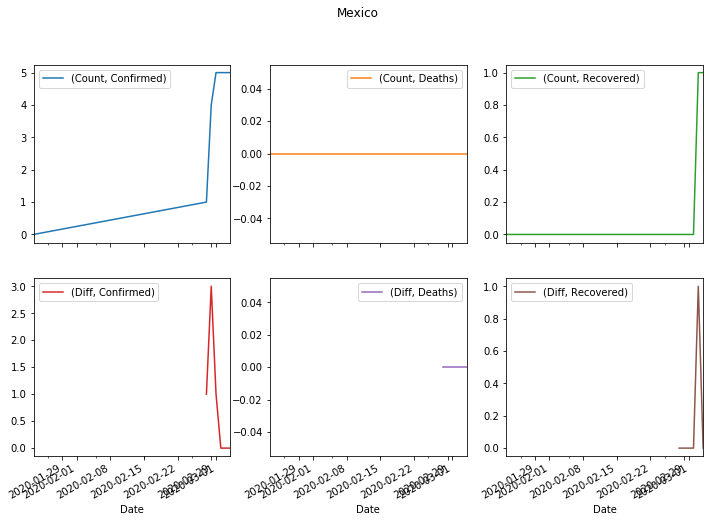

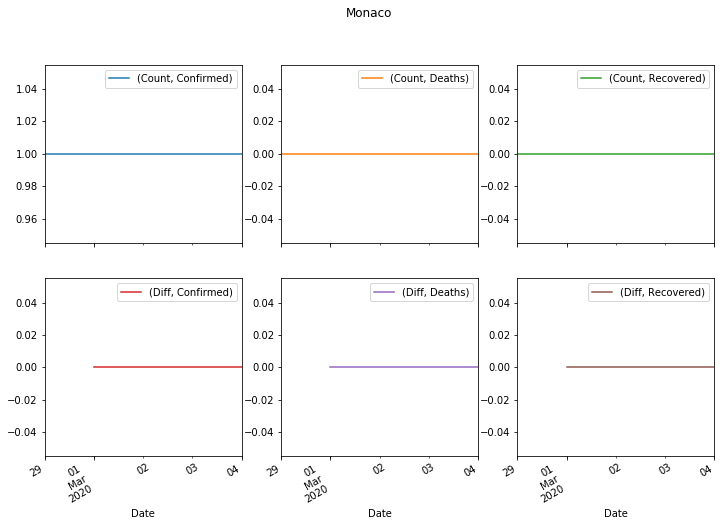

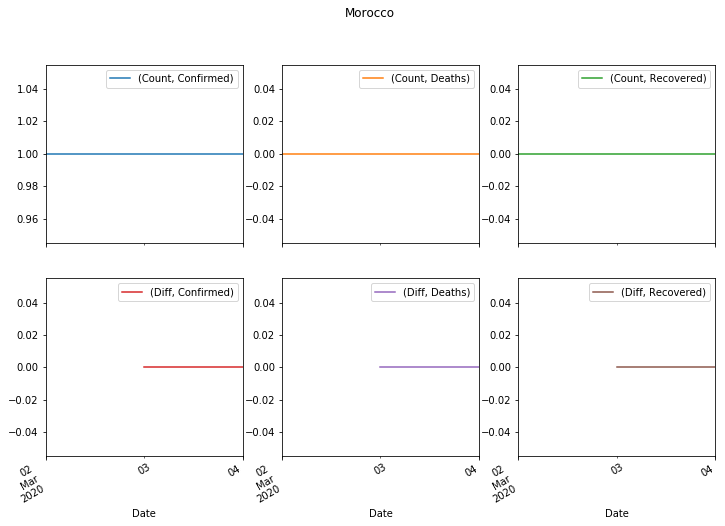

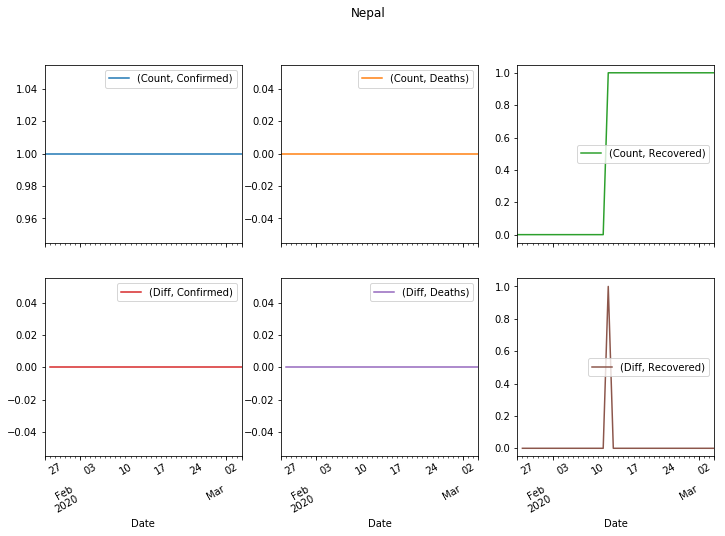

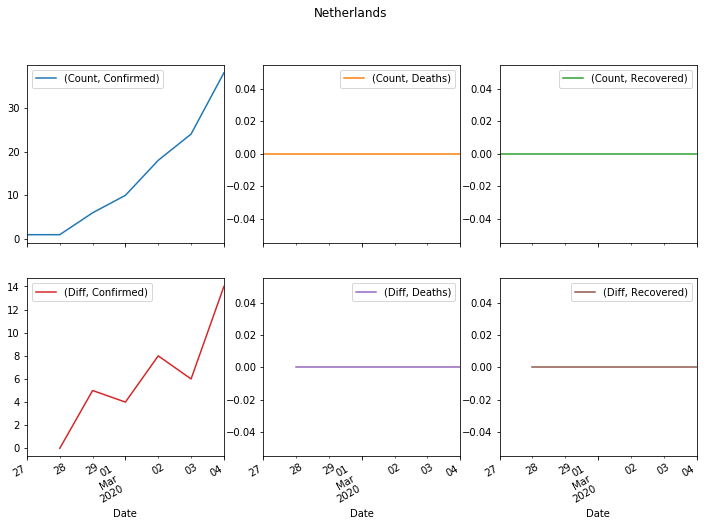

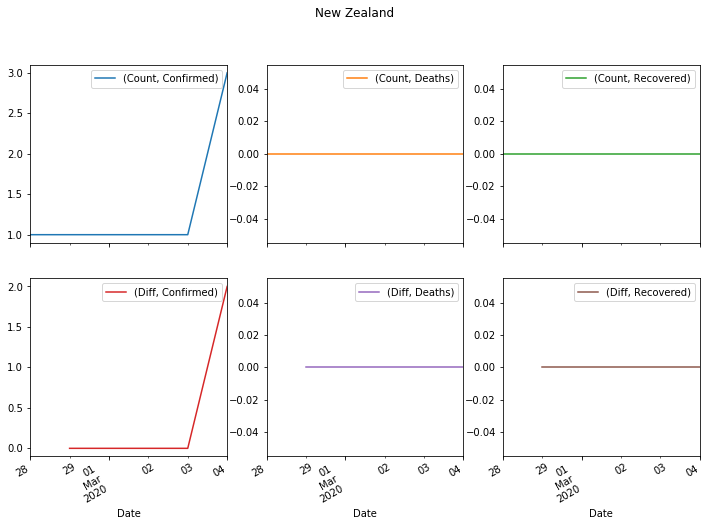

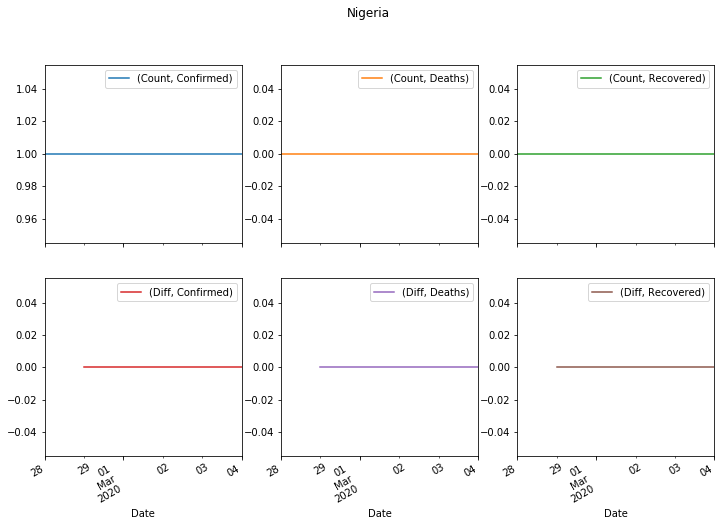

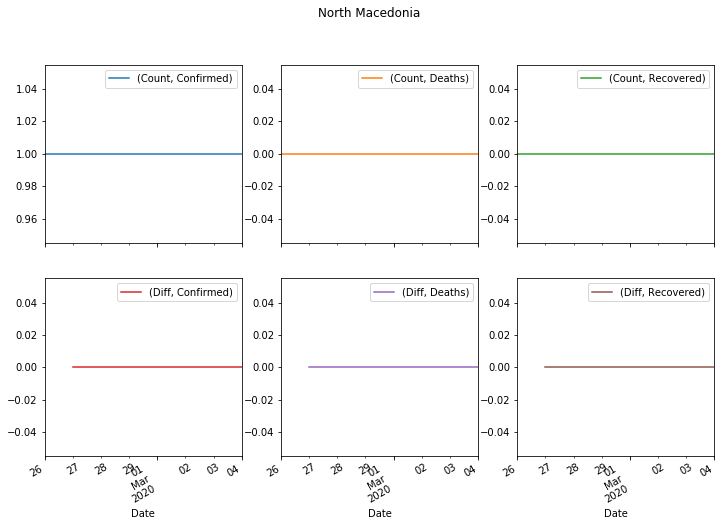

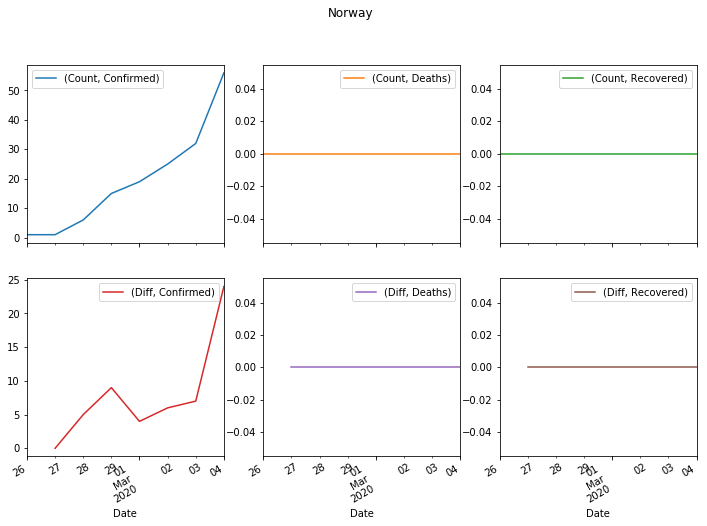

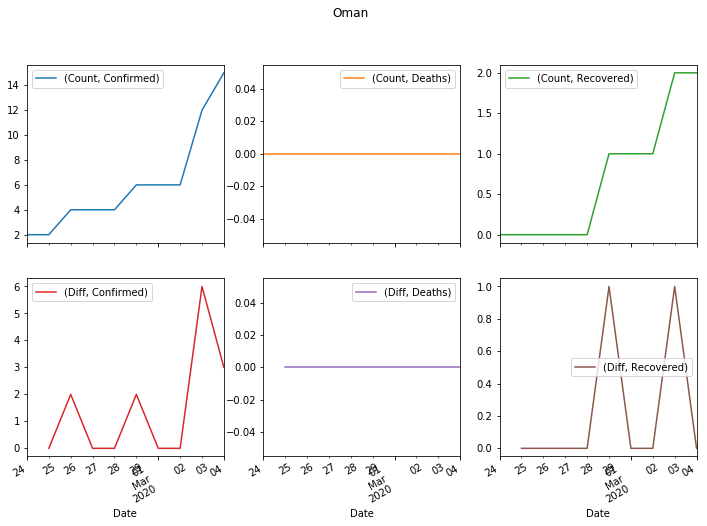

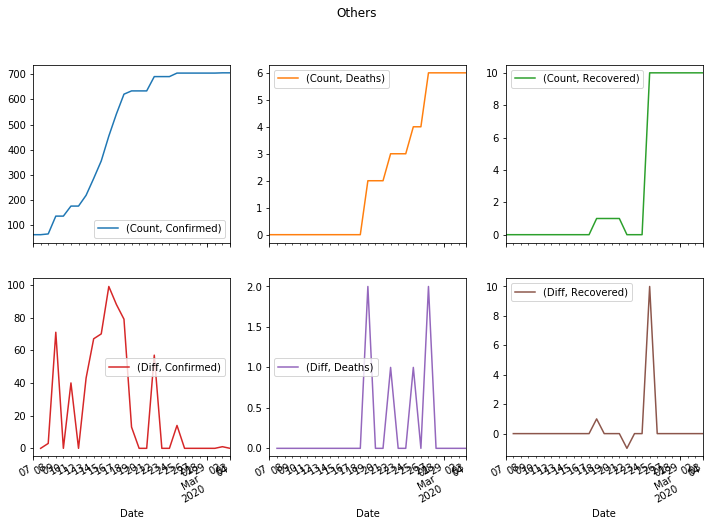

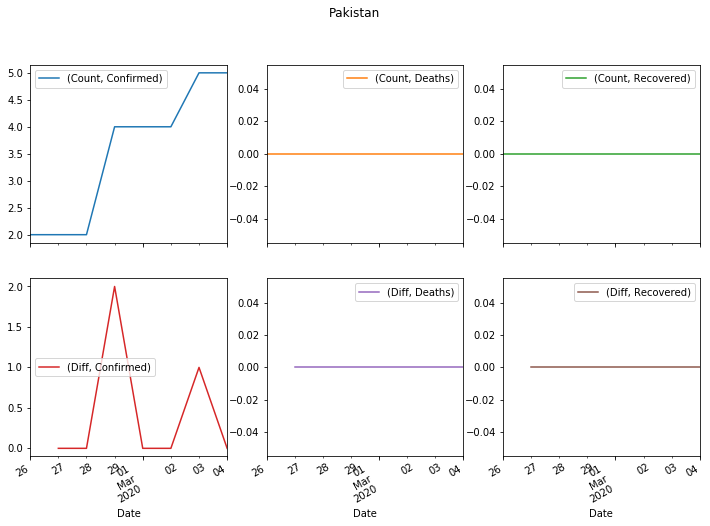

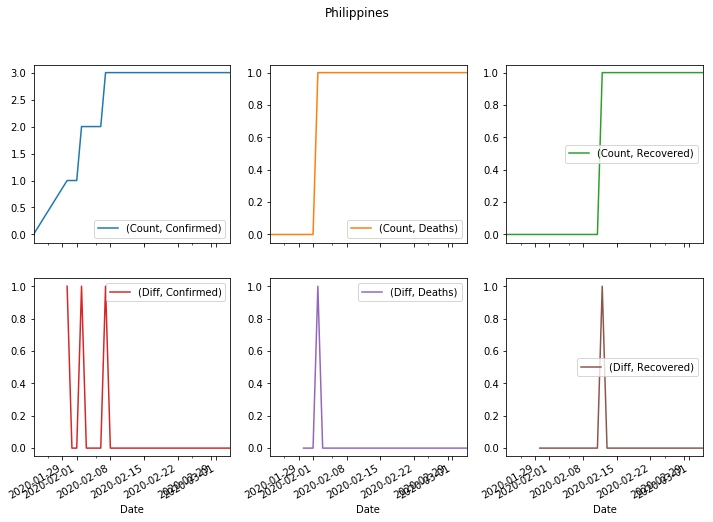

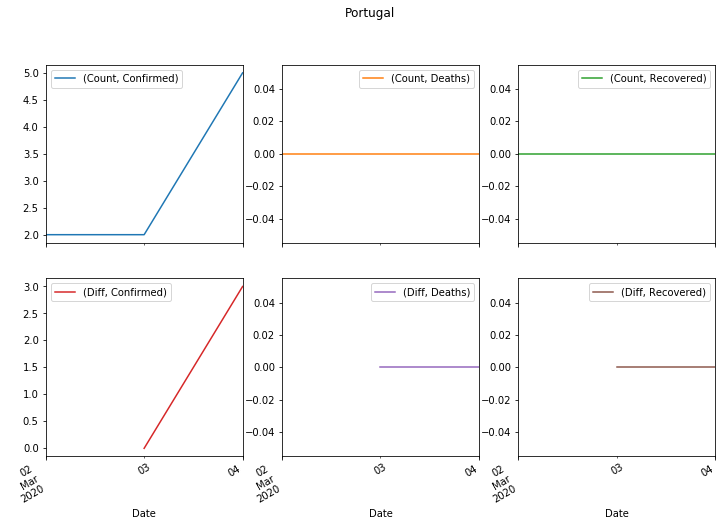

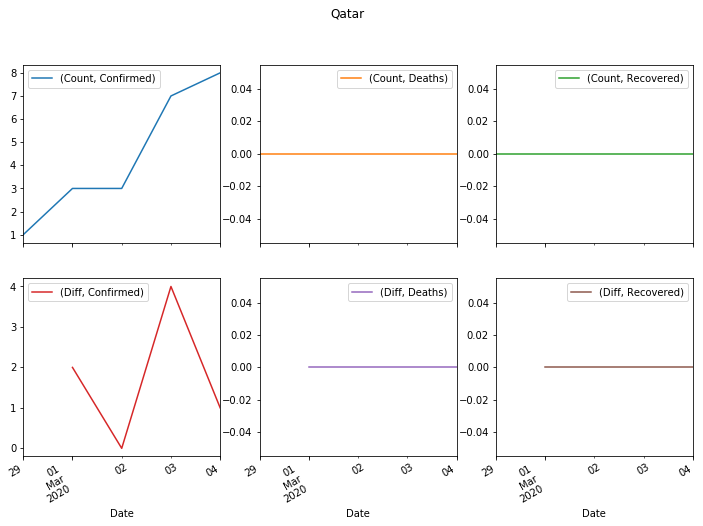

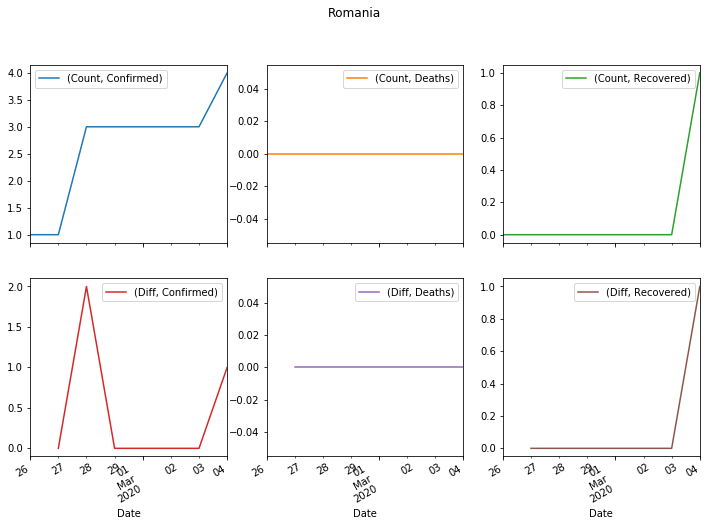

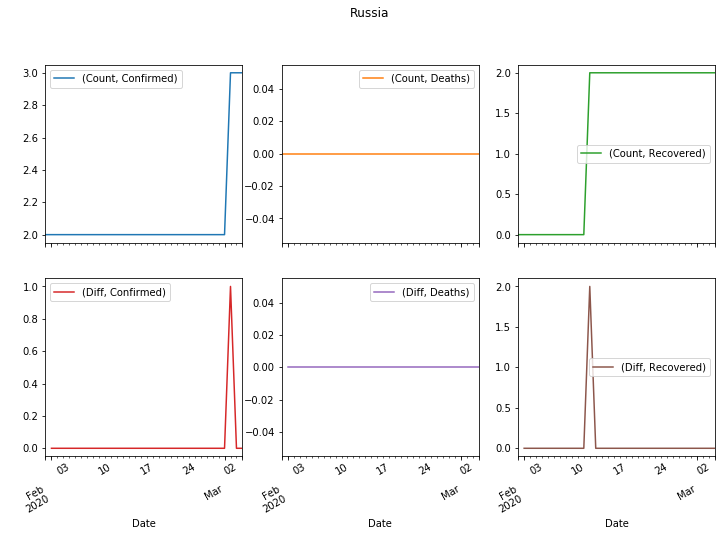

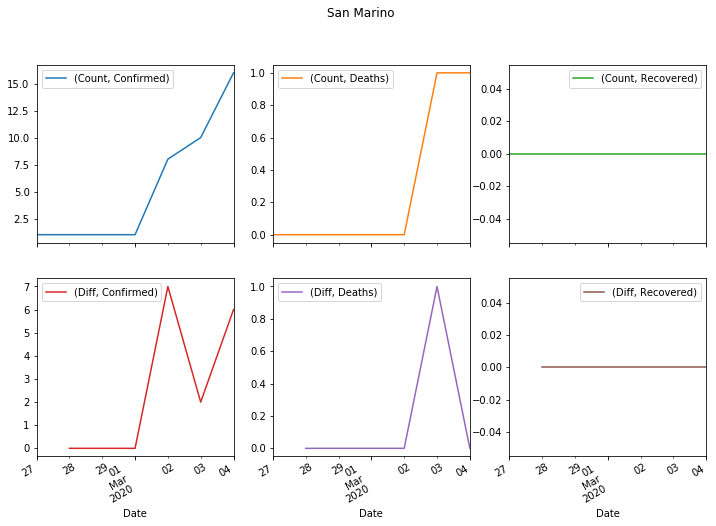

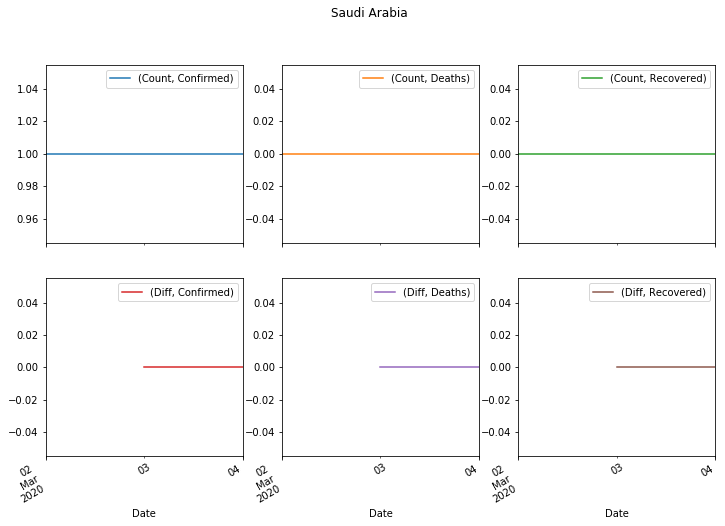

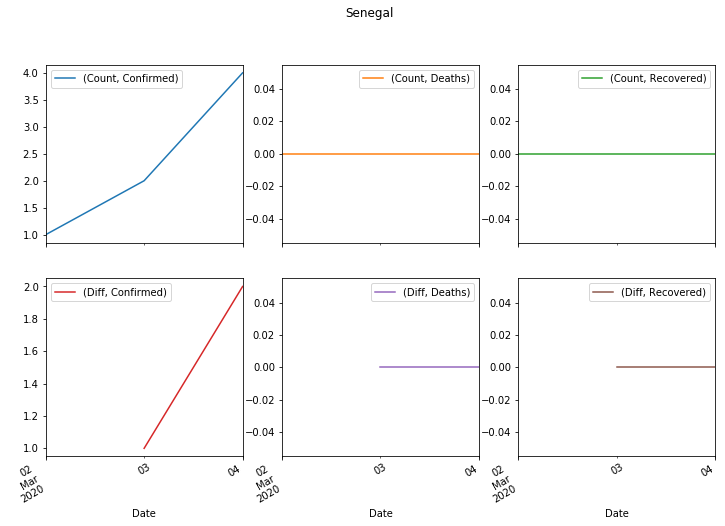

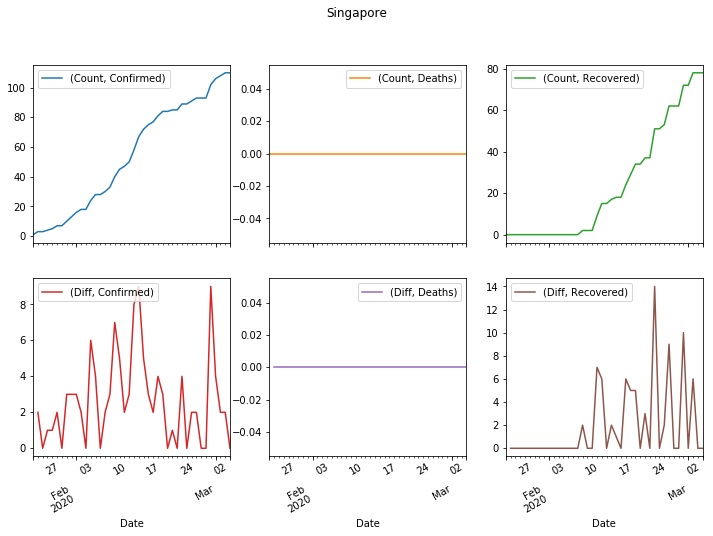

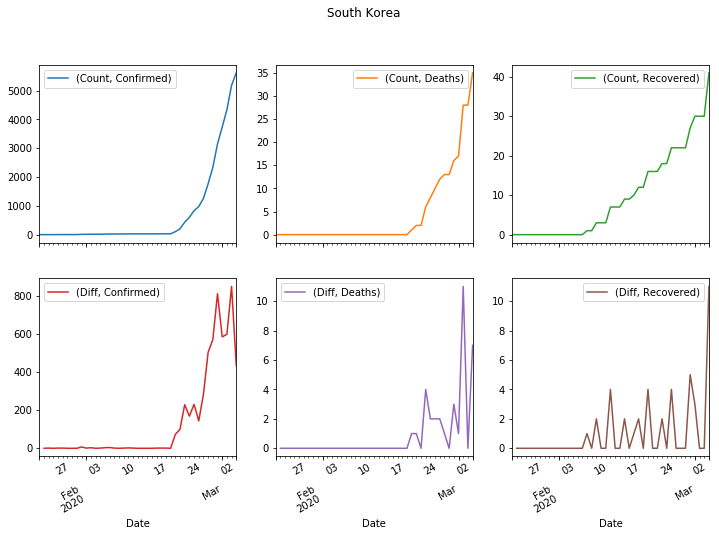

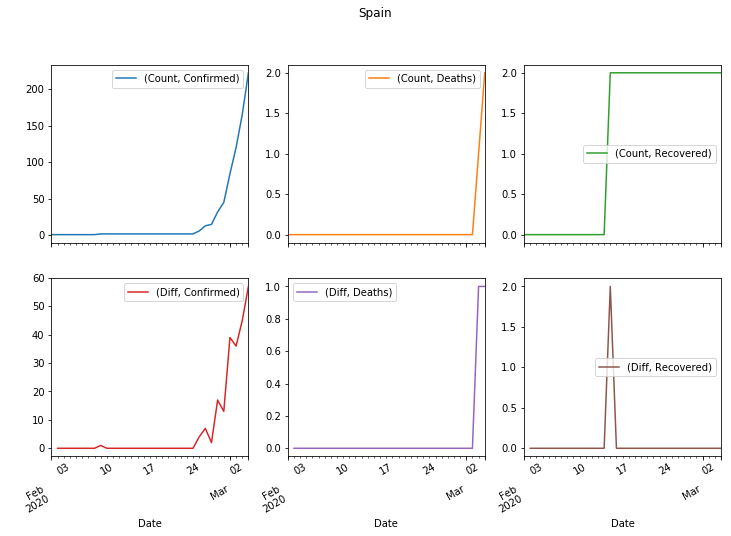

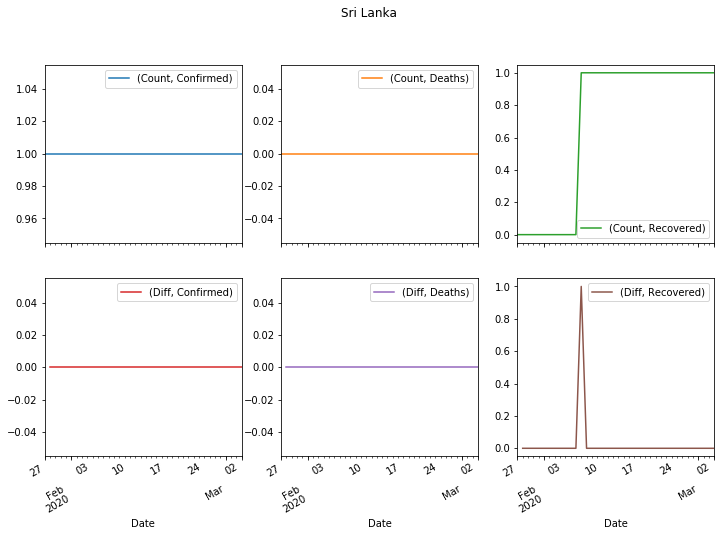

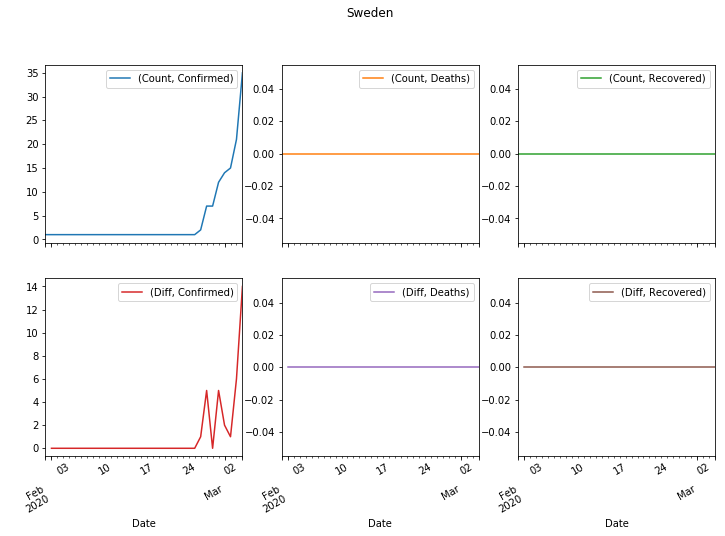

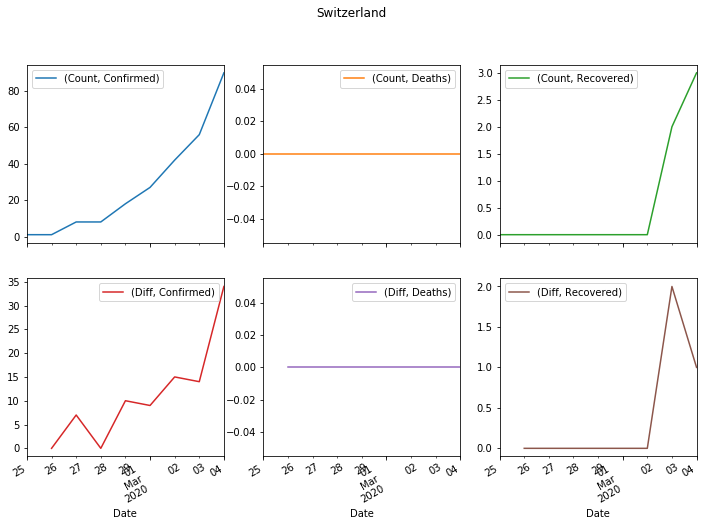

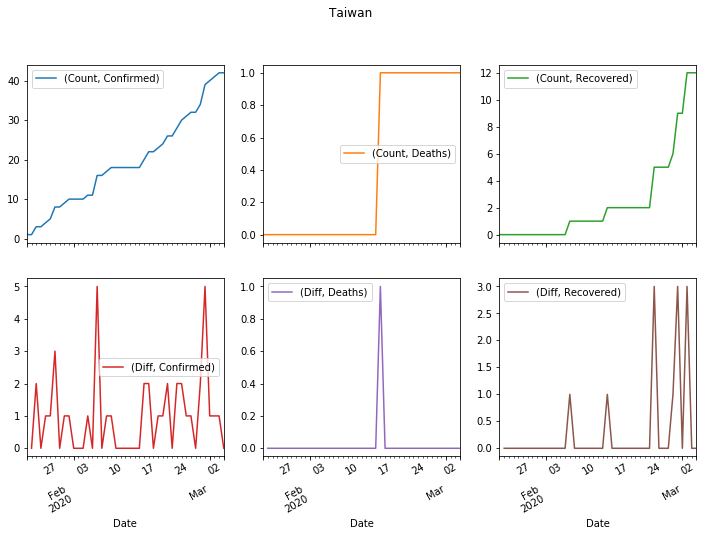

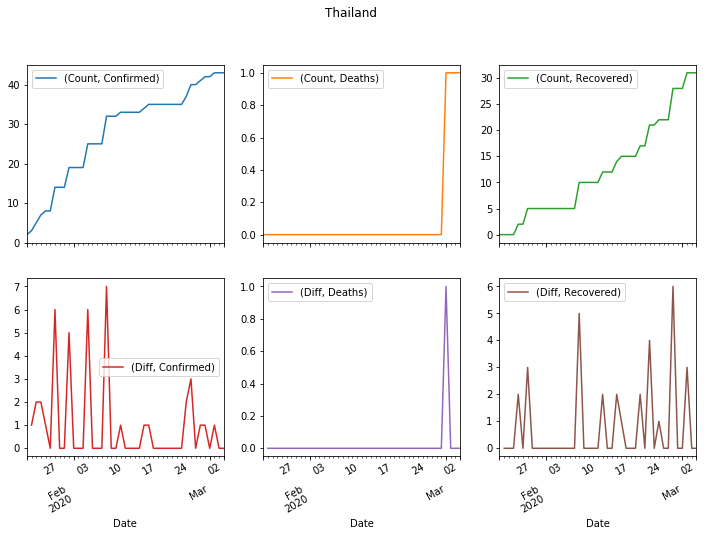

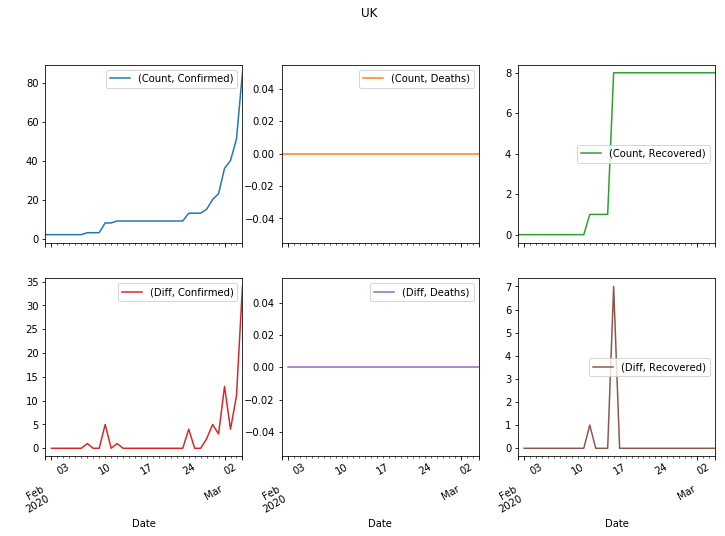

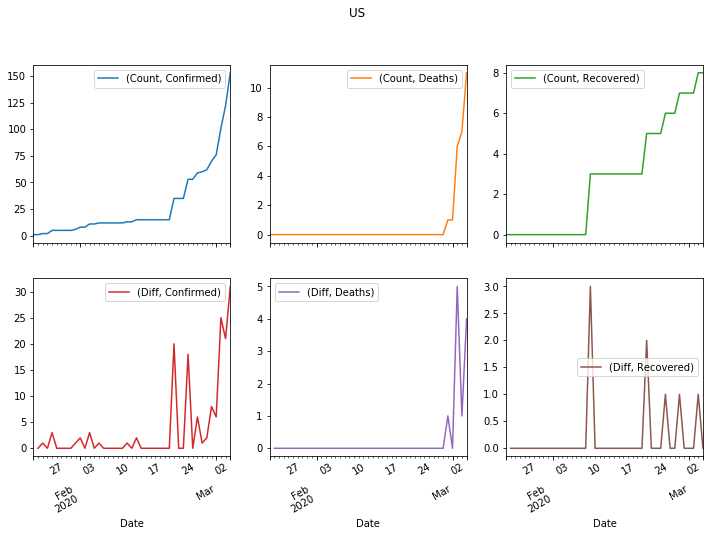

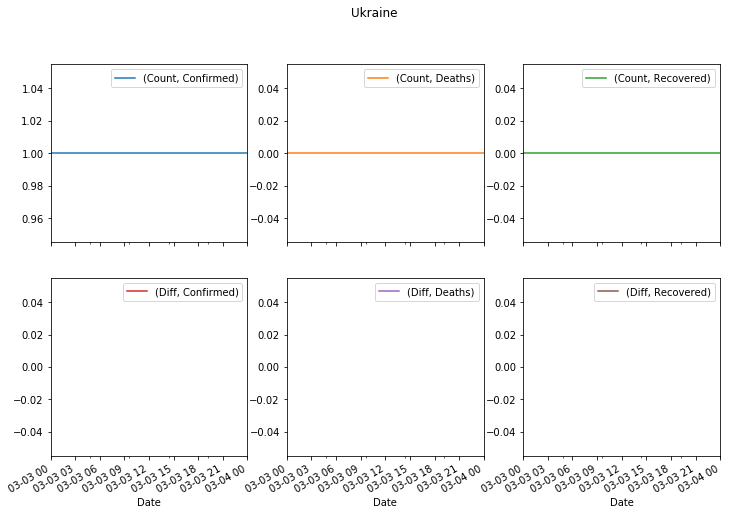

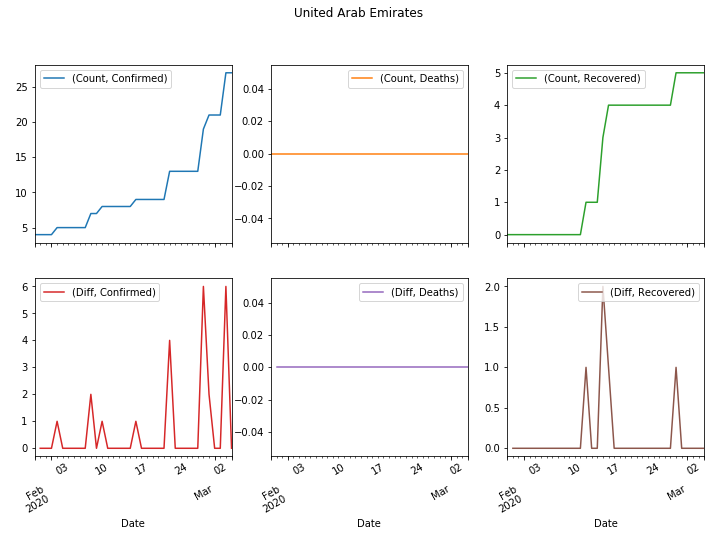

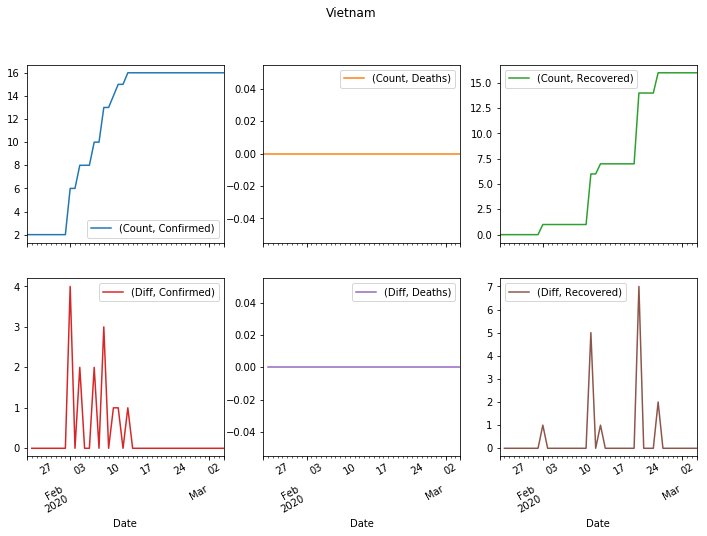

In [7]:
unique_country = group_country.index.unique(level=0)
for c in unique_country:
    count = group_country.loc[c, :]
    diff = count.diff()
    country_specific = pd.concat([count, diff],
                                 axis=1, keys=["Count","Diff"])
    if len(diff) > 1:
        country_specific.plot(title=c, subplots=True,
                              layout=(2, 3), sharex=True, figsize=(12, 8))

# Growth (Logarithmic display)
You can draw comparison graphs by country for Confiremd, Deaths and Recovered. The y-axis is logarithmic.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)
/opt/conda/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


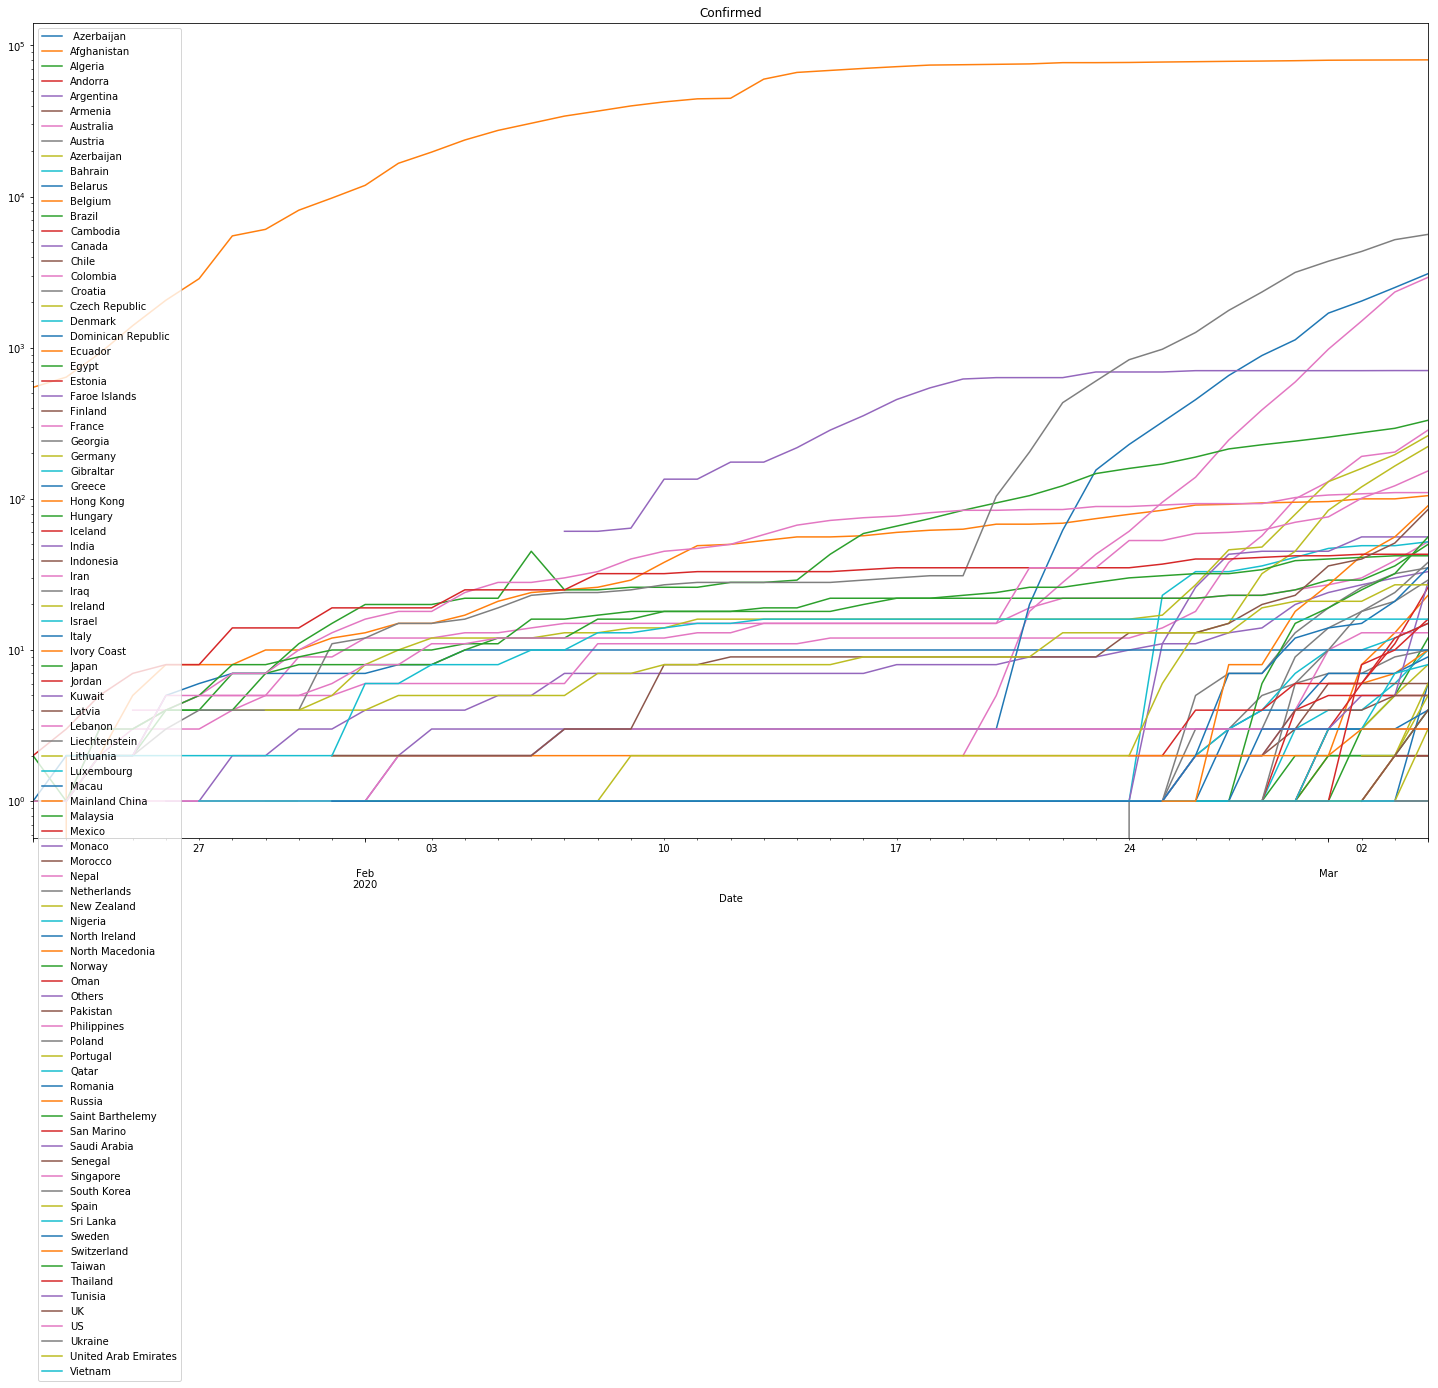

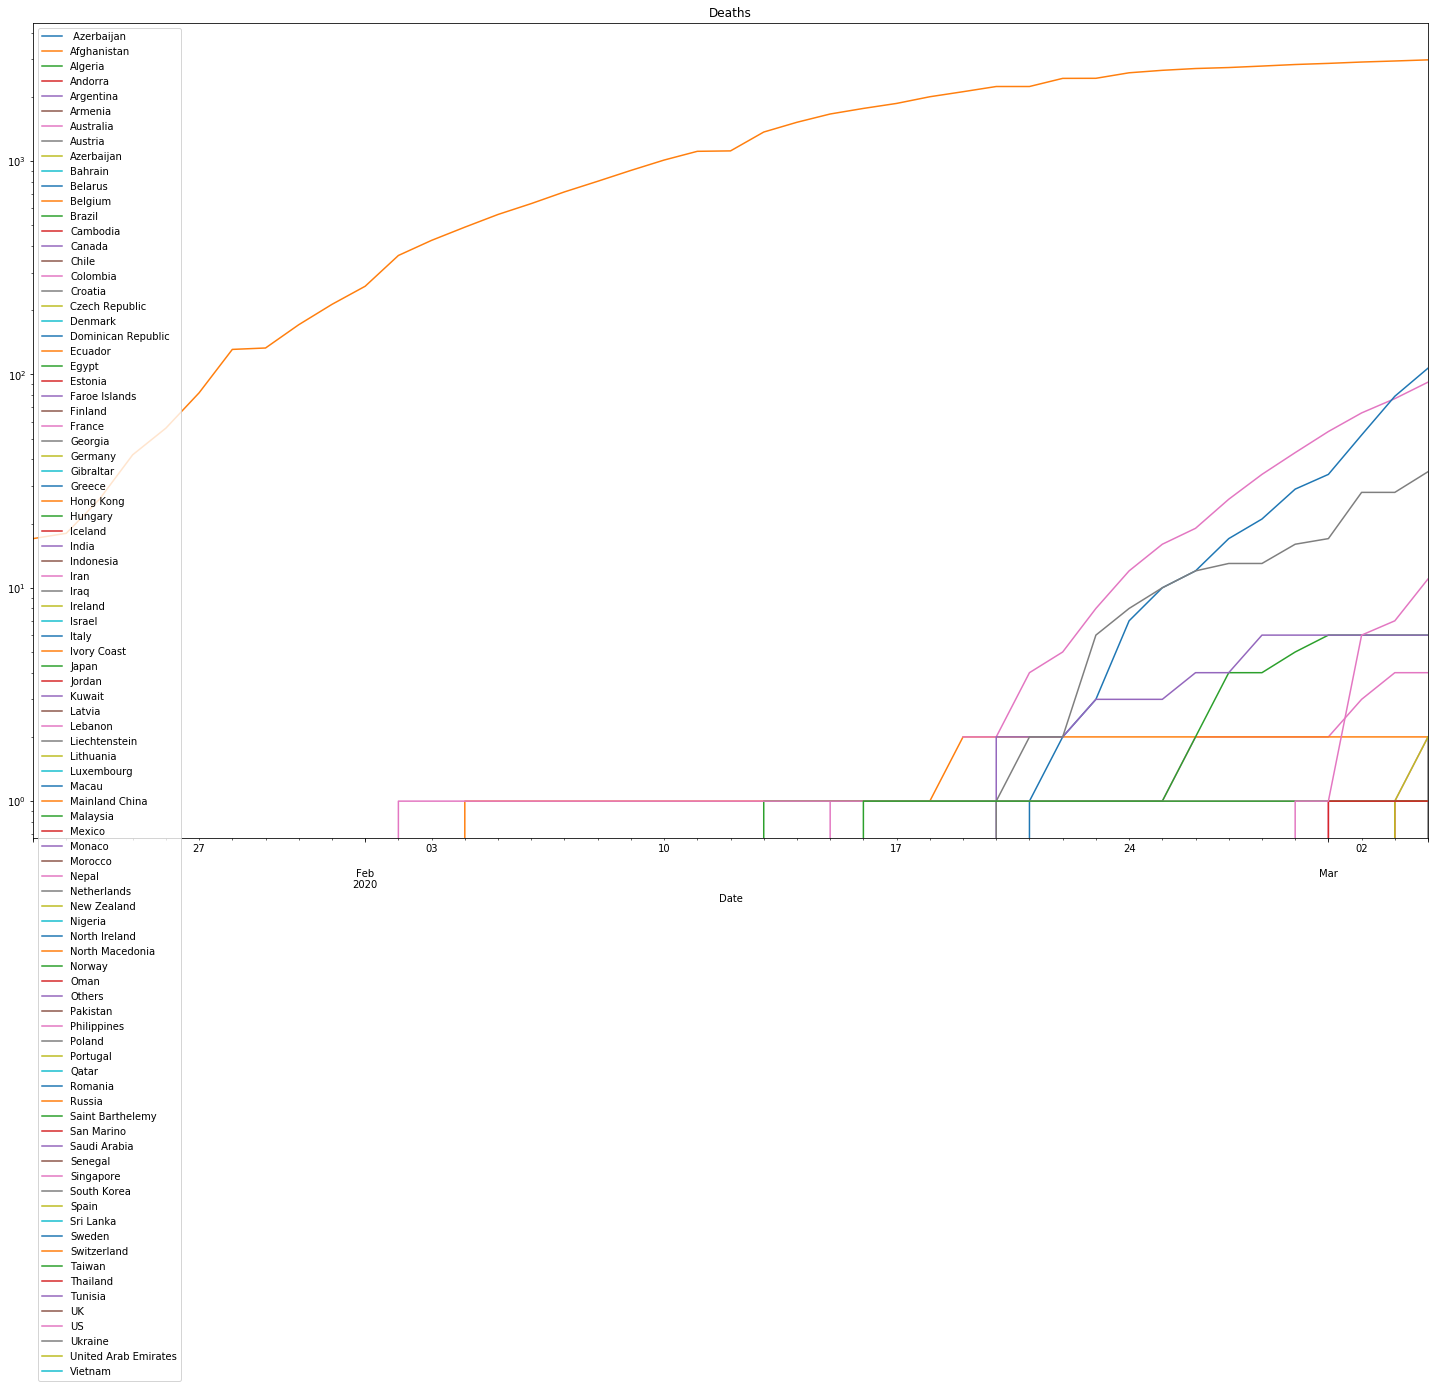

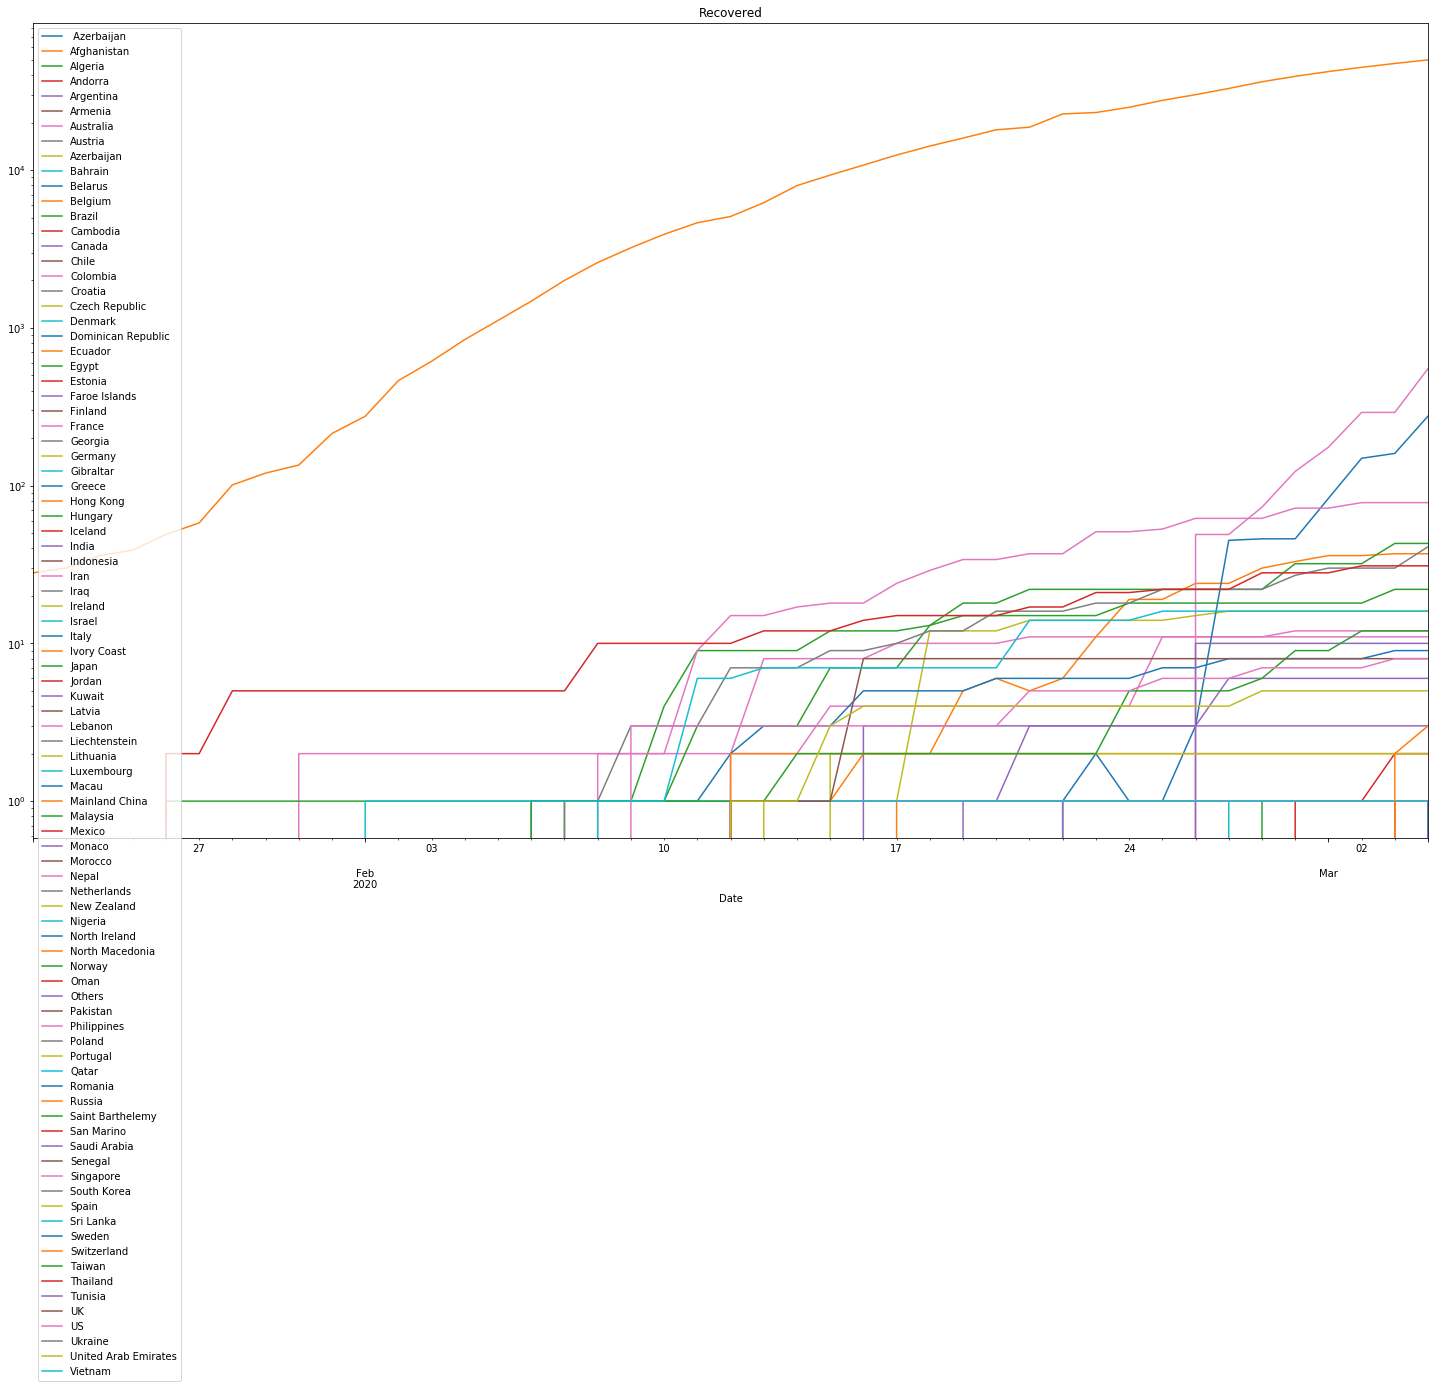

In [8]:
for name in ["Confirmed", "Deaths", "Recovered"]:
    ax = group_country[name].unstack(level=0).plot(title=name, logy=True, figsize=(25, 15))
    ax.legend(loc='upper left')